In [1]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
# für 
from random import shuffle 

class Event:
    def __init__(self, time, action, bm):
        self.time = time
        self.action = action
        self.bm = bm
    def __lt__(self, other):
        return (self.time, self.bm) < (other.time, other.bm)
    def __le__(self, other):
        return (self.time, self.bm) <= (other.time, other.bm)

class passagier:
    def __init__(self, Station):
        self.station = Station
        self.time = 0
    def __lt__(self, other):
        return (self.time, self.station) < (other.time, other.station)
    def __le__(self, other):
        return (self.time, self.station) <= (other.time, other.station)
        

def shuffle0(passengers):
    for i in range(len(passengers)):
        x = [j for j in range(len(passengers[i]))]
        shuffle(x)
        passengers[i] = [passengers[i][k] for k in x]

def calc_pic(grah, ListeColor, ListeSize):
    nx.draw_kamada_kawai(graph, with_labels = True, node_color = ListeColor, node_size = ListeSize)
    


In [2]:
def solve(eventq, passengers, bms, graph):
    ListeNodes = list(graph.node)
    ListeColor = ['blue']*len(ListeNodes)
    #save(passengers, bms)
    while eventq:
        # Abbruch Bedingung
        if ([len(passengers[i]) == 0 for i in range(len(passengers))] == [True]*len(passengers)) and ([len(bms[i]['n_passengers']) == 0 for i in range(len(bms))] == [True]*len(bms)):
            return print('Ende')
        event = hq.heappop(eventq)
        bm = bms[event.bm]
        itinerary_len = len(bm['itinerary'])
        current_node = bm['itinerary'][bm['stop'] % itinerary_len]
        cn_number = [idx for idx, station in enumerate(bm['itinerary']) if station == current_node][0] #Current Node Number
        
        next_node = bm['itinerary'][(bm['stop']+1) % itinerary_len]
        nn_number = [idx for idx, station in enumerate(bm['itinerary']) if station == next_node][0]
        print('Fahrzeug {} ist am Knoten {}, der nächste Halt {}, die aktuelle Zeit: {}'.format(bm['name'],current_node, next_node, event.time))
        
        ListeSize = [len(i)*10 for i in passengers]
        ListeColor[current_node] = bm['color']
        calc_pic(graph, ListeColor, ListeSize)
        #plt.savefig("img/{}.png".format(event.time))
        plt.show()
        ListeColor[current_node] = 'blue'
        
        if event.action == 'load':
            print('acton: {}'.format(event.action))
            free = bm['capacity'] - len(bm['n_passengers'])
            print('Fahrzeug {} load'.format(bm['name']))
            print('Fahrzeug {} hat {} Plätze frei'.format(bm['name'],free))
            while len(bm['n_passengers']) < bm['capacity']:
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger['station'] in bm['itinerary']]
                print('Warten: {}'.format(waiting))
                if not waiting:
                    break
                passenger = passengers[current_node].pop(waiting[0])
                
                exit_node = passenger['station']
                en_nubmer = [idx for idx, station in enumerate(bm['itinerary']) if station == exit_node][0]
                print('Zielknoten ist {}, und hat die Nummer: {}, ist {}'.format(exit_node, en_nubmer, cn_number))
                
                ListExit = []
                for i in range((en_nubmer-cn_number)% itinerary_len):
                    ListExit += [ bm['travel_times'][(cn_number+i)%itinerary_len] ]
                print(ListExit)
                ExitTime = event.time
                for i in ListExit:
                    ExitTime += i
                print('Exit Time: {}'.format(ExitTime))
                passenger['exit_time'] = ExitTime
                bm['n_passengers'] += [passenger]
                hq.heappush(eventq, Event(ExitTime,'exit', event.bm))
                #bessere 'exit_time' berechung muss her
                #print('time:', event.time+passenger['exit_time'])
            hq.heappush(eventq, Event(event.time + bm['travel_times'][nn_number], 'load', event.bm))
            bm['stop'] += 1
        #ListeColor[current_node] = 'blue'
        # Generate events for exiting passengers
        elif event.action == 'exit':
            print('acton: {}'.format(event.action))
            ######################
            # Muss noch gemacht werden!!
            ######################
            #waiting = [idx for idx, passenger in enumerate(bm['n_passengers']) if passenger['exit_time'] == event.time]
            #if not waiting:
            #    print('Something is Wrong')
            #    raise Exception('Unknown event action')
            #passenger = bm['n_passengers'].pop(waiting[0])
            ######################
            passenger = bm['n_passengers'].pop(0)
            print('Fahrzeug {}, Passagier {} steit aus, time {}'.format(bm['name'], passenger, event.time))
            print('Es sind {} Passagiere in der Bahn'.format(len(bm['n_passengers'])))
        else:
            raise Exception('Unknown event action')

Fahrzeug 0 ist am Knoten 4, der nächste Halt 3, die aktuelle Zeit: 0


/home/phil/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


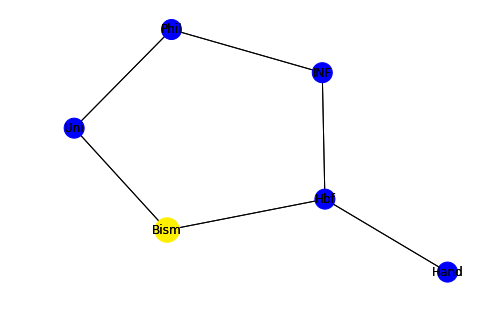

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 30 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Zielknoten ist 0, und hat die Nummer: 4, ist 0
[12, 13, 14, 15]
Exit Time: 54
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
Zielknoten ist 1, und hat die Nummer: 3, ist 0
[12, 13, 14]
Exit Time: 39
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
Zielknoten ist 3, und hat die Nummer: 1, ist 0
[12]
Exit Time: 12
Warten: [0, 1, 2, 3

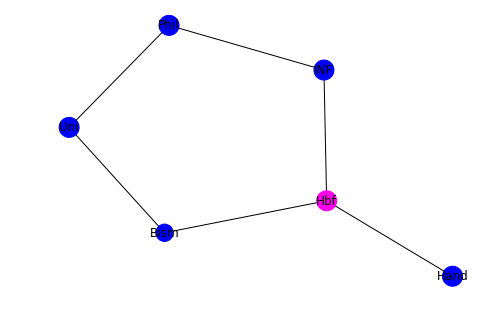

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 30 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Zielknoten ist 1, und hat die Nummer: 1, ist 0
[15]
Exit Time: 15
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Zielknoten ist 1, und hat die Nummer: 1, ist 0
[15]
Exit Time: 15
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Zielknoten ist 2, und hat die Nummer: 2, ist 0
[15, 14]
Exit Time: 29
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Zielknoten ist 2, und hat die Nummer: 2, ist 0
[15, 14]
Exit Time: 29
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,

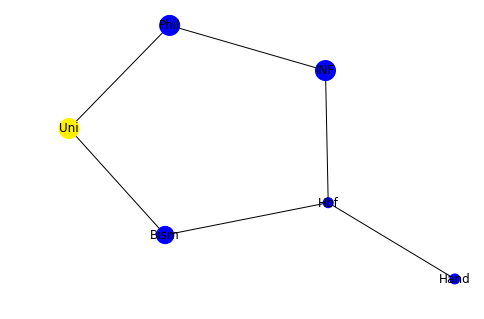

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 12
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


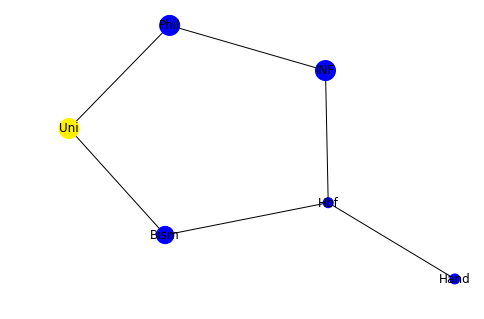

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 12
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


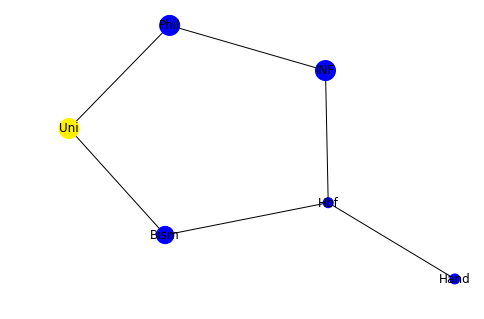

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 12
Es sind 27 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


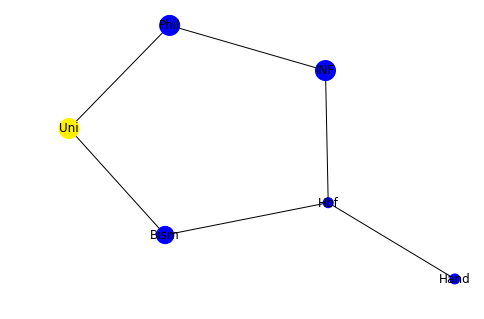

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 12
Es sind 26 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


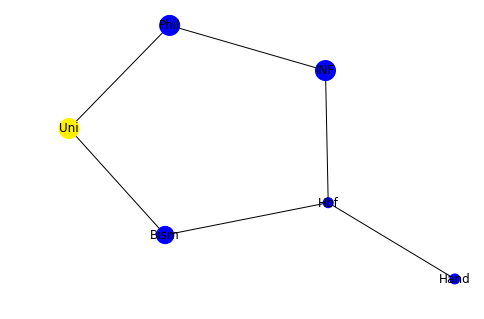

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 12
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


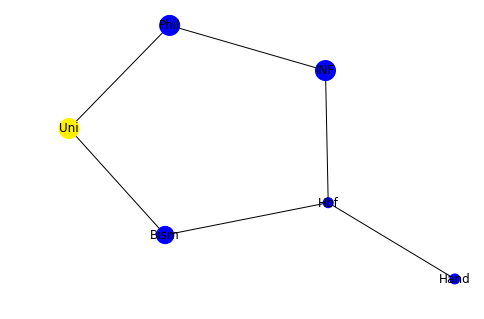

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 12
Es sind 24 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


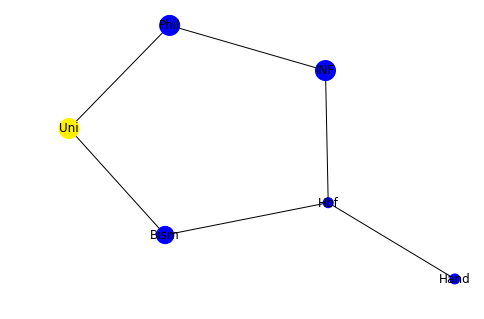

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 12
Es sind 23 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


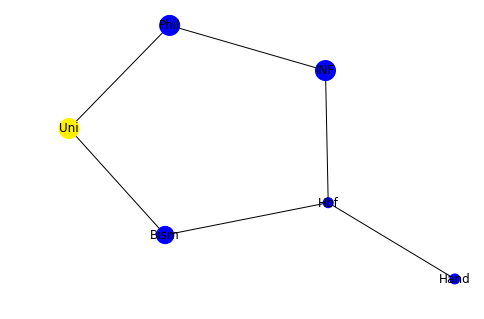

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 12
Es sind 22 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 12


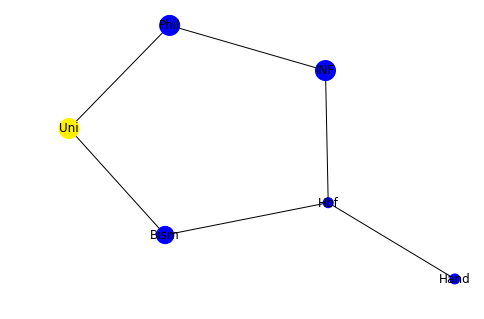

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 12
Es sind 21 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 13


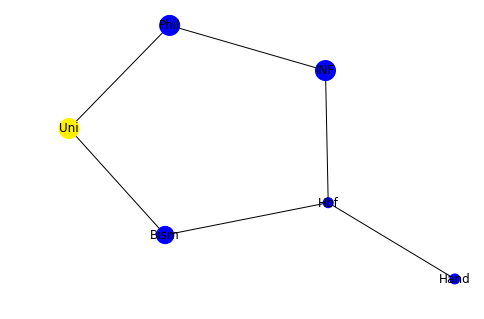

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 9 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Zielknoten ist 0, und hat die Nummer: 4, ist 1
[13, 14, 15]
Exit Time: 55
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Zielknoten ist 4, und hat die Nummer: 0, ist 1
[13, 14, 15, 16]
Exit Time: 71
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Zielknoten ist 0, und hat die Nummer: 4, ist 1
[13, 14, 15]
Exit Time: 55
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Zielknoten ist 0, und hat die Nummer: 4, ist 1
[13, 14, 15]
Exit Time: 55
Warten: [0, 1, 2, 3, 4, 5, 6, 7

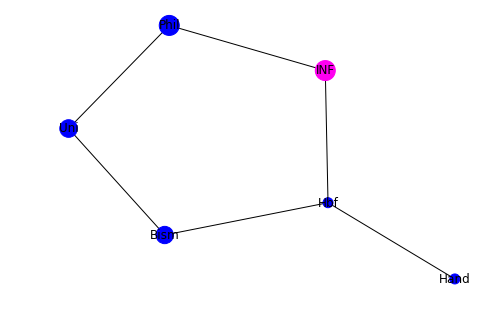

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 0 Plätze frei
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


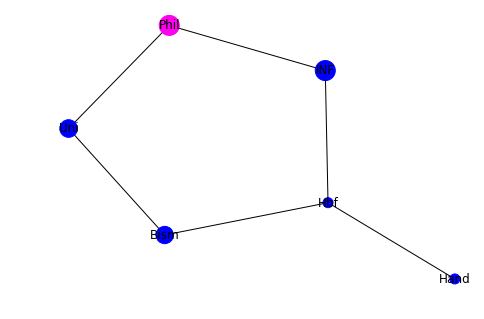

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 15
Es sind 29 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


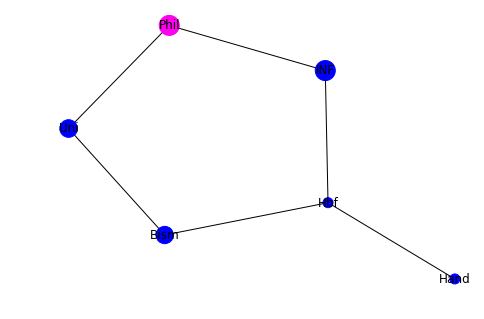

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 15
Es sind 28 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


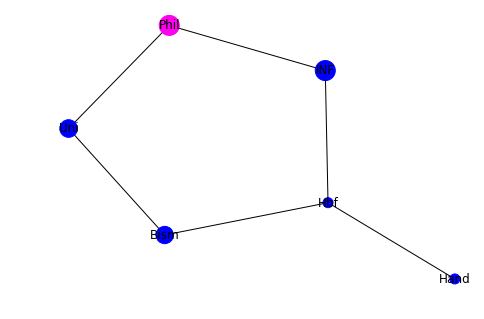

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


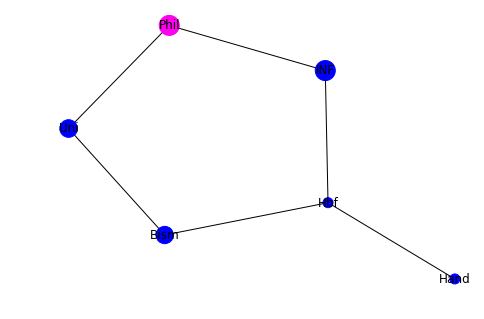

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


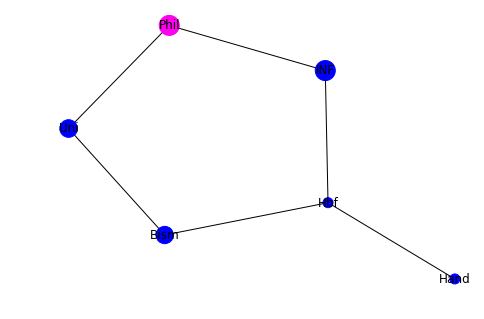

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 25 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


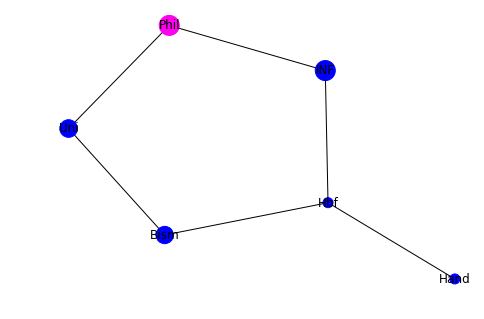

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 24 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


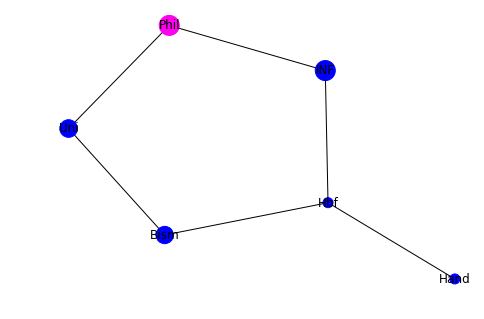

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 15
Es sind 23 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


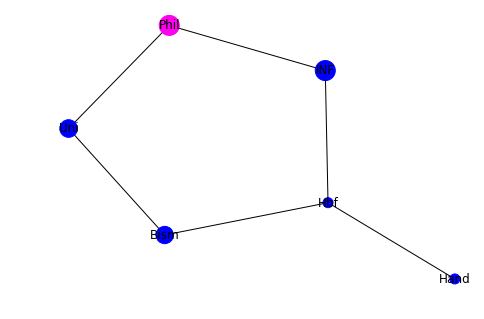

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 22 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


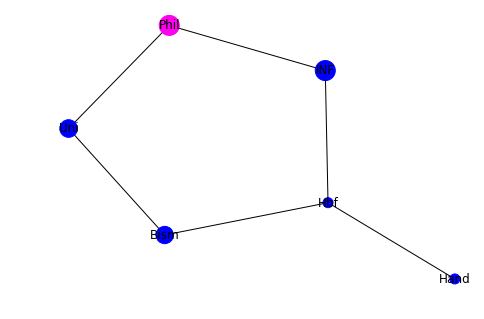

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 21 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


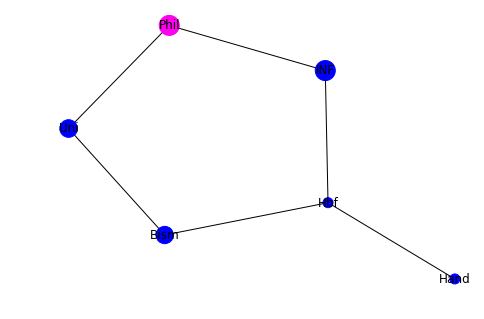

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 15
Es sind 20 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


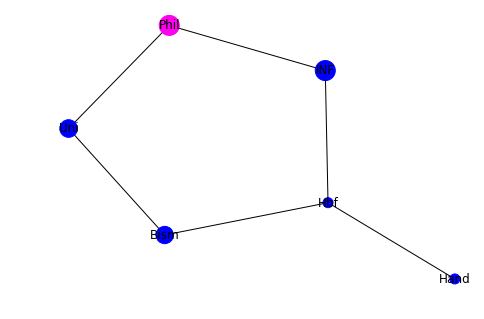

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 15
Es sind 19 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


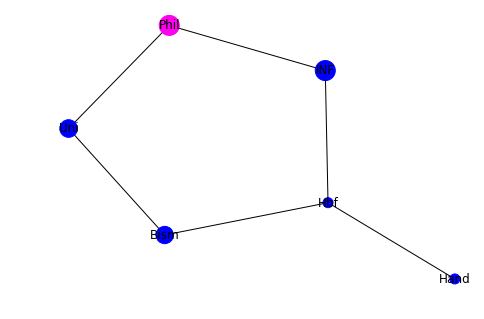

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 18 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


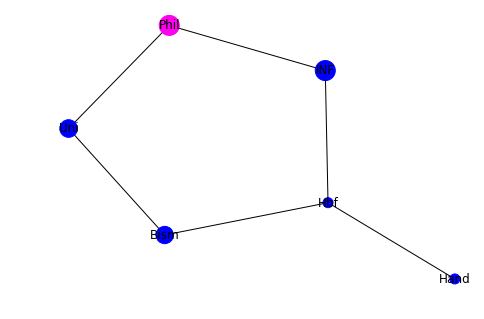

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 15
Es sind 17 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


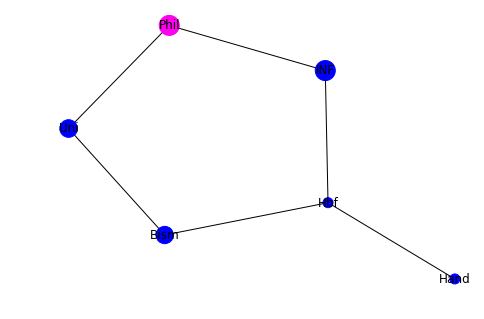

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 16 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


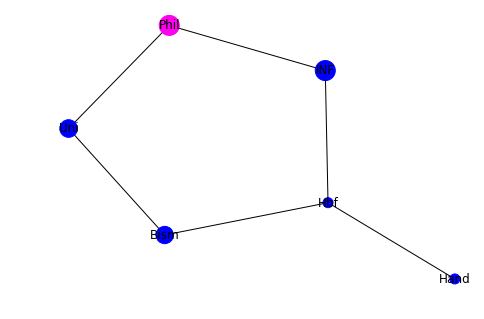

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 15 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 15


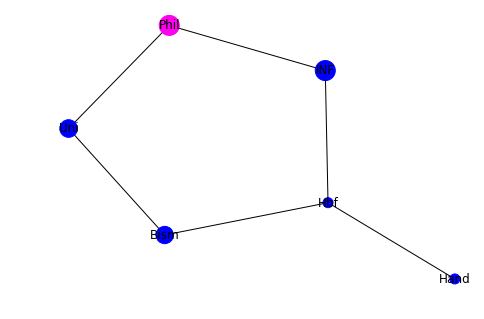

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 15
Es sind 14 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 27


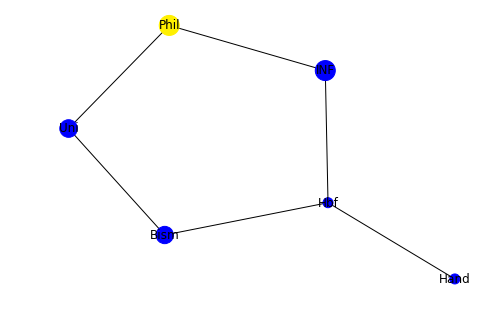

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 0 Plätze frei
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 27


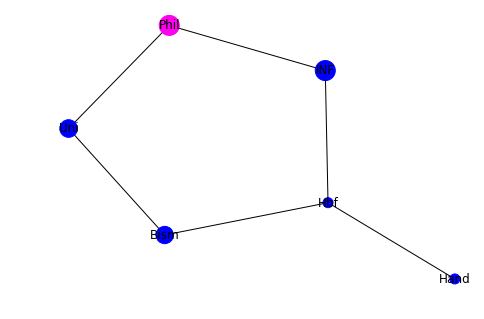

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 16 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Zielknoten ist 3, und hat die Nummer: 3, ist 2
[13]
Exit Time: 40
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Zielknoten ist 3, und hat die Nummer: 3, ist 2
[13]
Exit Time: 40
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 52
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Zielknoten ist 3, und hat die Nummer: 3, ist 2
[13]
Exit Time: 40
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,

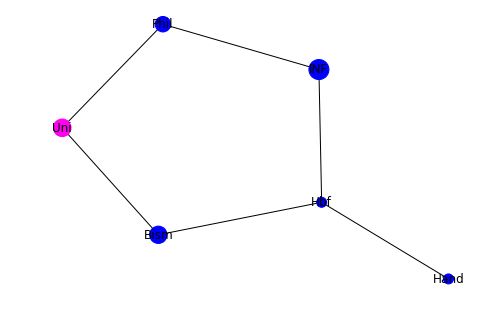

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 29 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


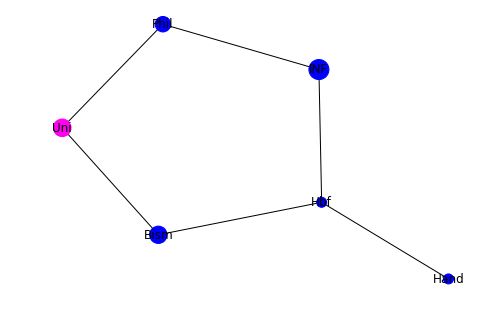

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 29
Es sind 28 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


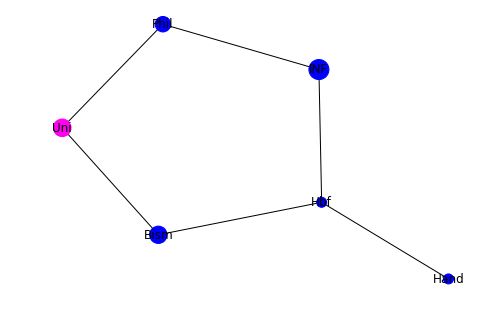

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


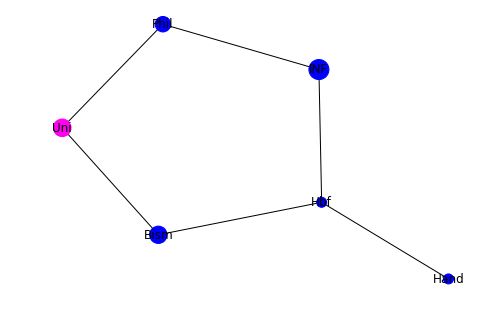

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


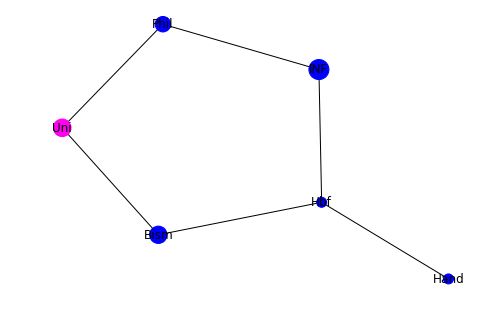

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 25 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


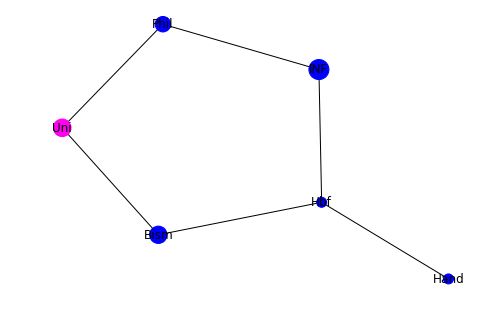

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 24 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


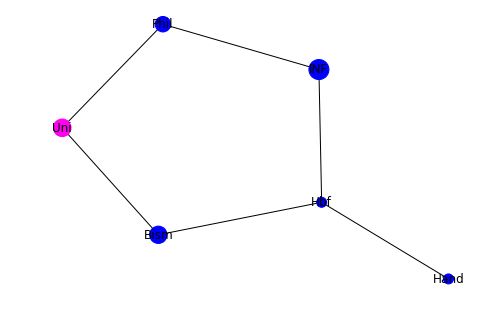

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 29
Es sind 23 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


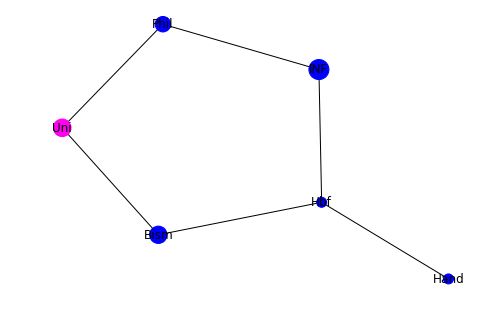

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 22 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


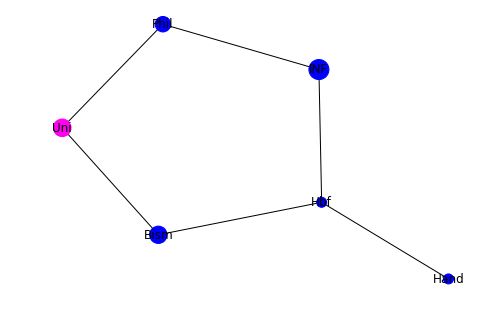

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 21 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


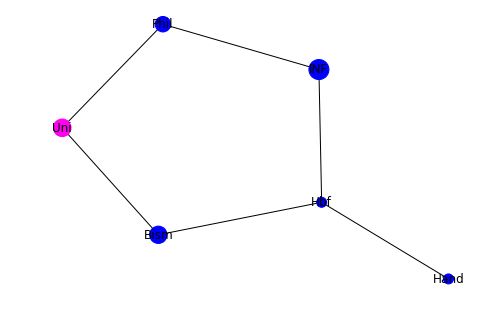

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 20 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


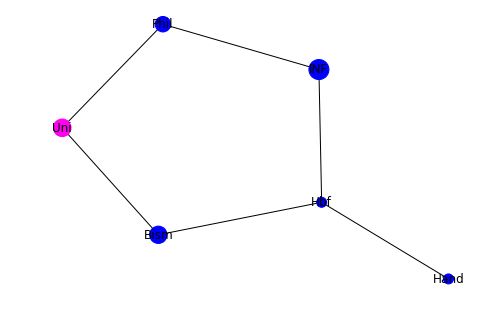

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 29
Es sind 19 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


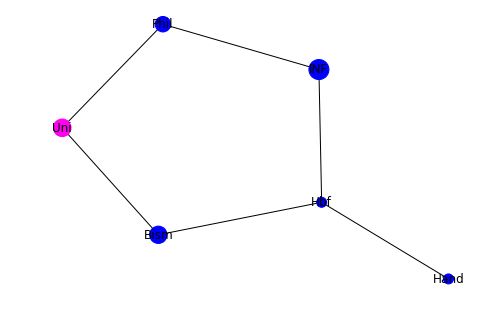

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 18 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


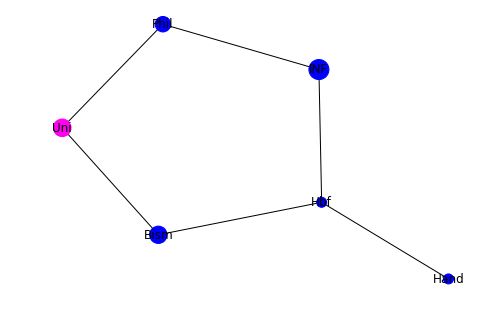

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 15} steit aus, time 29
Es sind 17 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 29


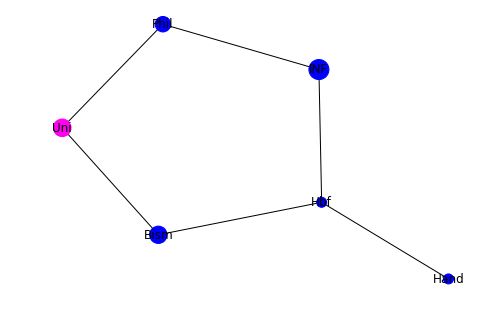

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 29} steit aus, time 29
Es sind 16 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


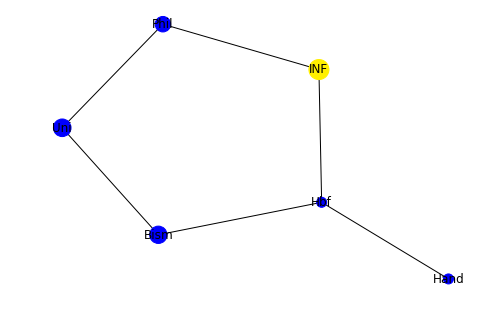

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 39
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


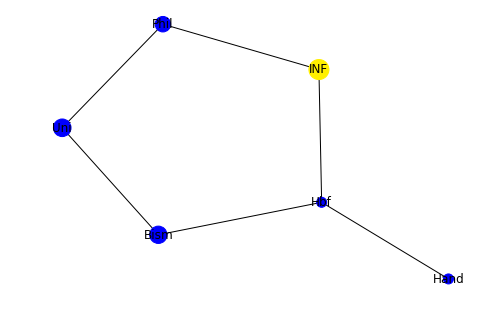

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 39
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


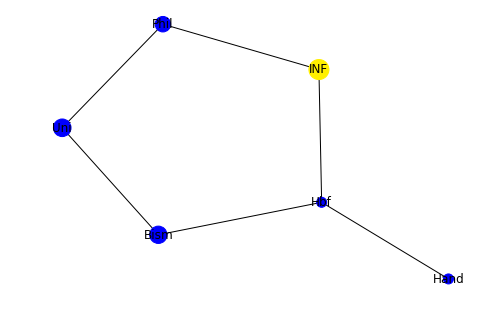

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 39
Es sind 27 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


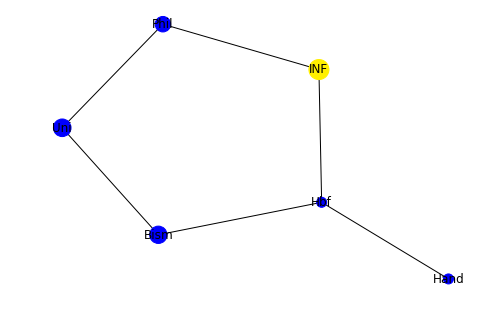

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 39
Es sind 26 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


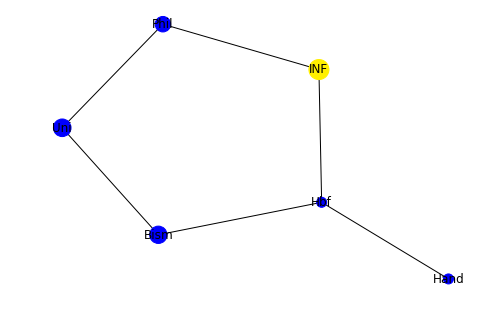

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 39
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


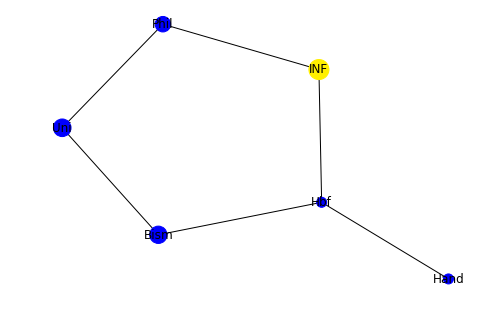

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 39
Es sind 24 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


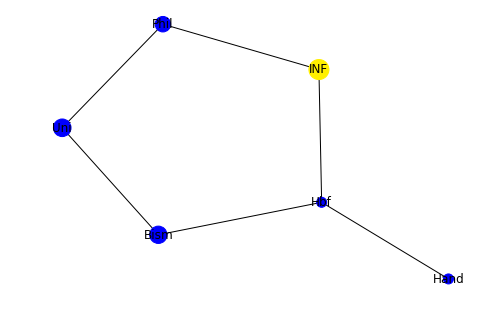

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 39
Es sind 23 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


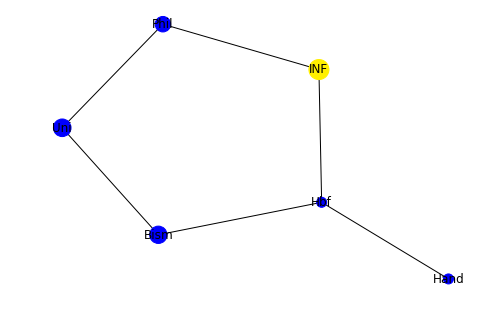

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 39
Es sind 22 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


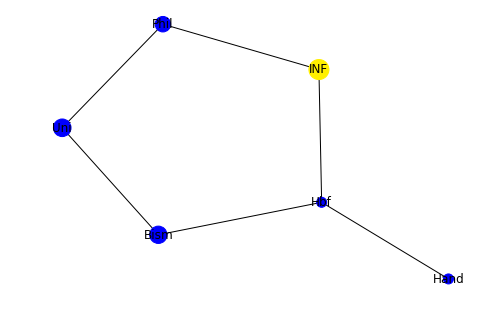

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 39
Es sind 21 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


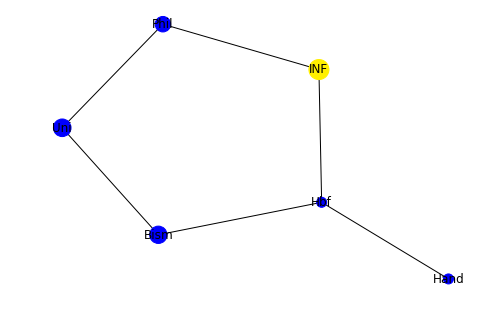

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 39
Es sind 20 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


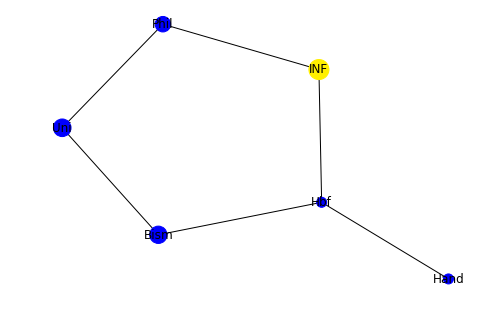

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 39
Es sind 19 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 39


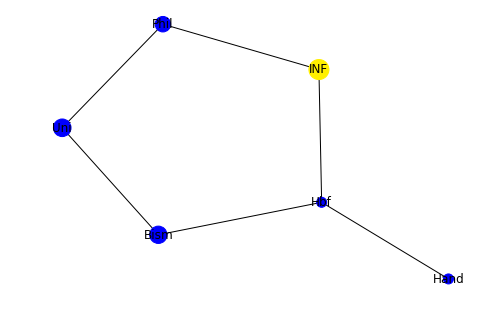

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 39
Es sind 18 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 39


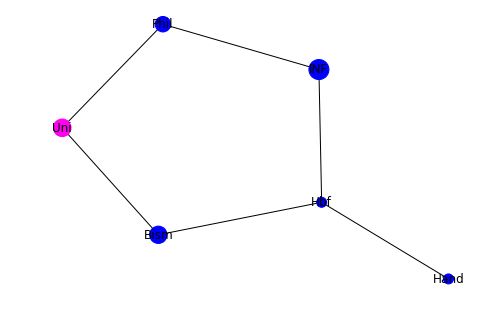

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 14 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Zielknoten ist 0, und hat die Nummer: 0, ist 3
[12, 16]
Exit Time: 67
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Zielknoten ist 0, und hat die Nummer: 0, ist 3
[12, 16]
Exit Time: 67
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Zielknoten ist 4, und hat die Nummer: 4, ist 3
[12]
Exit Time: 51
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Zielknoten ist 0, und hat die Nummer: 0, ist 3
[12, 16]
Exit Time: 67
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Zielknoten ist 4, und hat die Nummer: 4, ist 3
[12]
Exit Time: 51
Warten: [0, 1, 2, 3, 4, 5

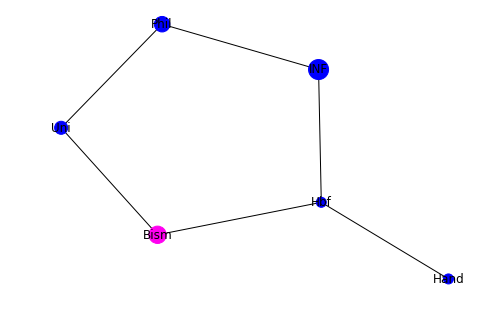

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 40
Es sind 29 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


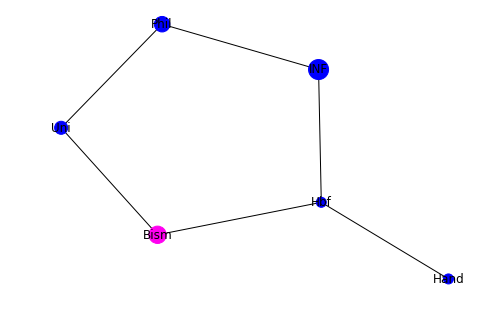

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 40
Es sind 28 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


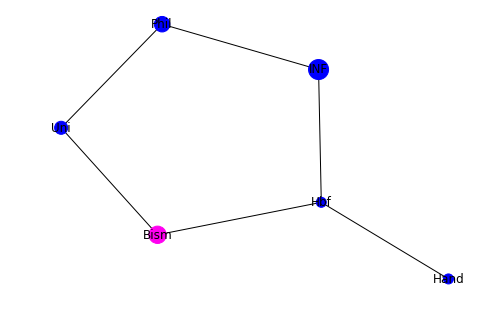

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 52} steit aus, time 40
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


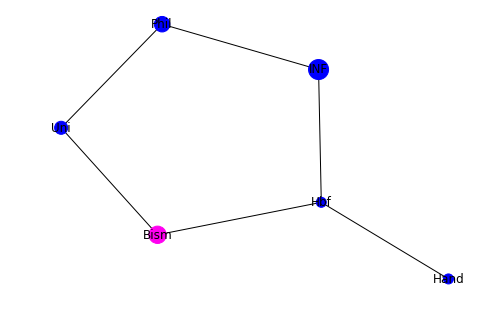

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 40
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


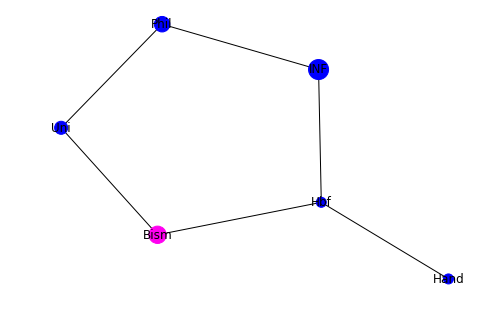

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 52} steit aus, time 40
Es sind 25 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


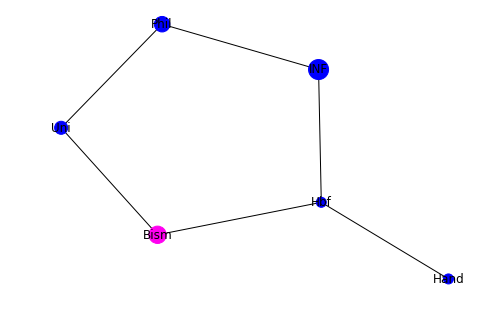

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 52} steit aus, time 40
Es sind 24 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


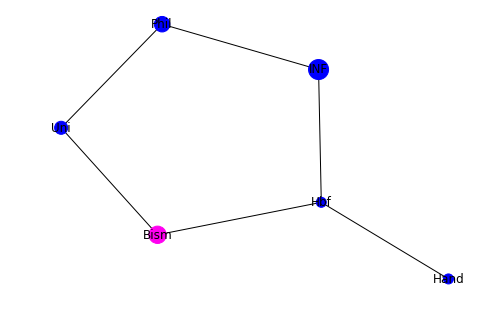

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 40
Es sind 23 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


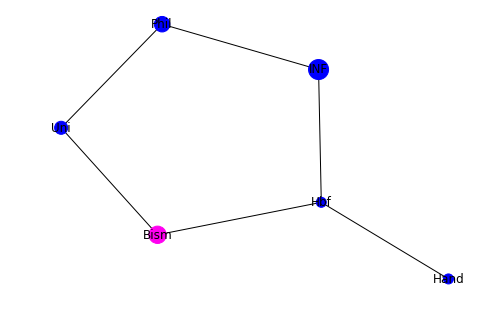

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 40
Es sind 22 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 40


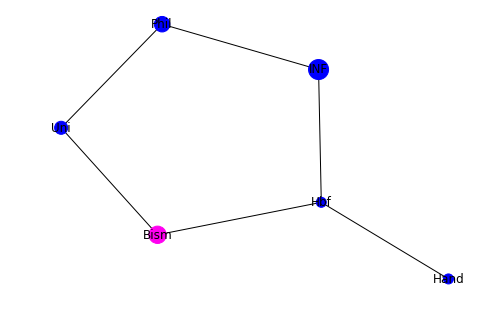

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 52} steit aus, time 40
Es sind 21 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 42


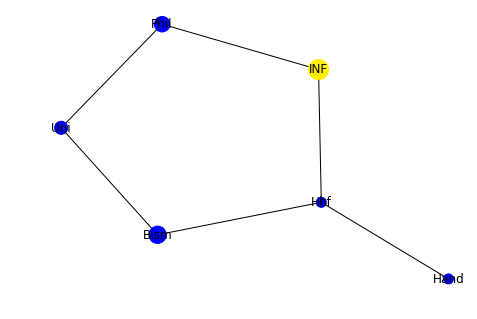

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 12 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Zielknoten ist 2, und hat die Nummer: 2, ist 3
[15, 16, 12, 13]
Exit Time: 98
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Zielknoten ist 3, und hat die Nummer: 1, ist 3
[15, 16, 12]
Exit Time: 85
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Zielknoten ist 3, und hat die Nummer: 1, ist 3
[15, 16, 12]
Exit Time: 85
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Zielknoten ist 3, und hat die Nummer: 1, ist 3
[15, 16, 12]
Exit Time: 85
Warten: [0, 1, 2, 3, 4, 5, 6, 

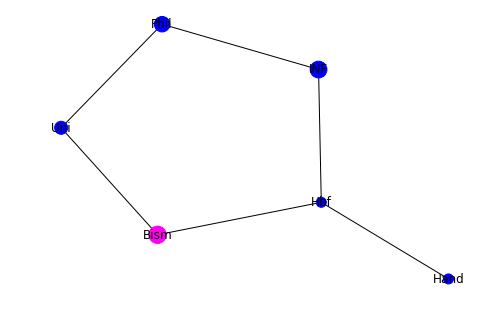

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 52} steit aus, time 51
Es sind 20 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 51


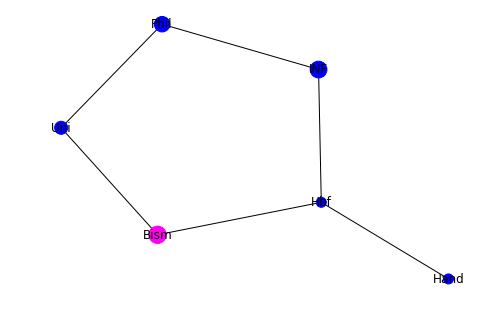

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 51
Es sind 19 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 51


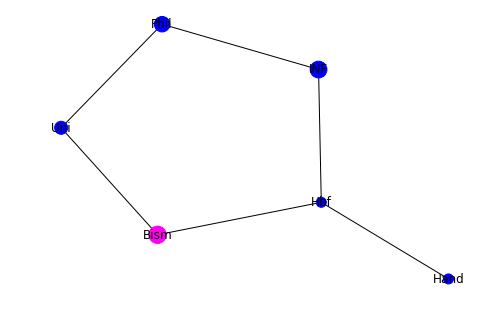

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 51
Es sind 18 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 51


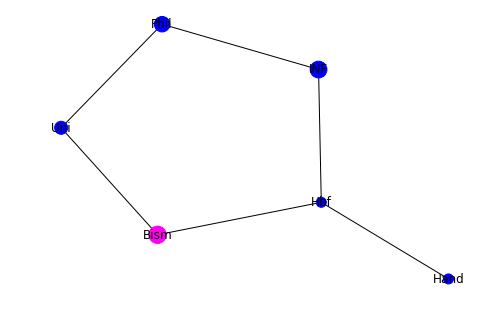

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 52} steit aus, time 51
Es sind 17 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 51


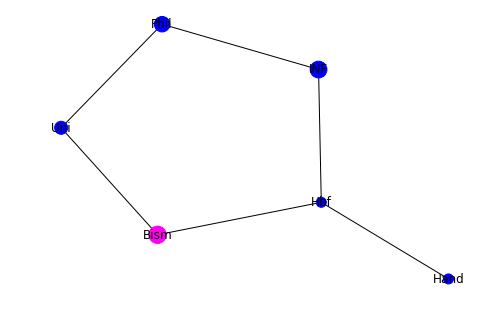

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 52} steit aus, time 51
Es sind 16 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 51


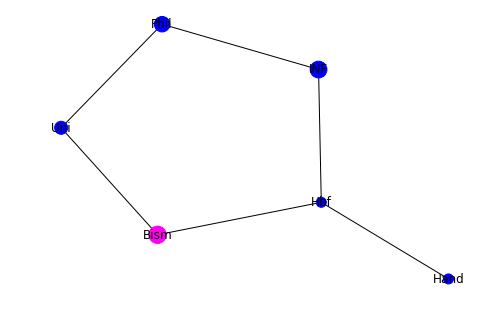

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 51
Es sind 15 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 51


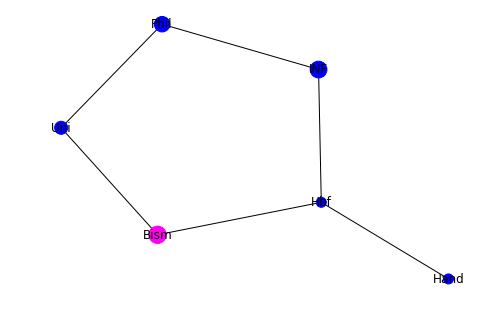

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 40} steit aus, time 51
Es sind 14 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 52


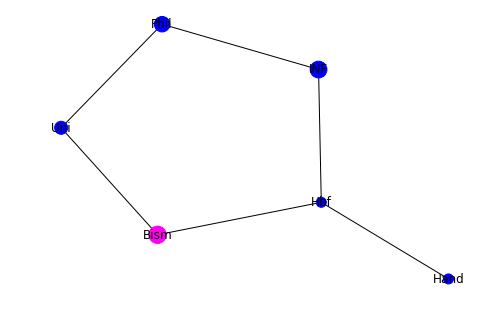

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 67} steit aus, time 52
Es sind 13 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 52


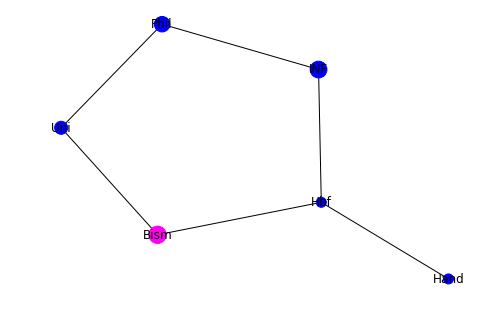

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 67} steit aus, time 52
Es sind 12 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 52


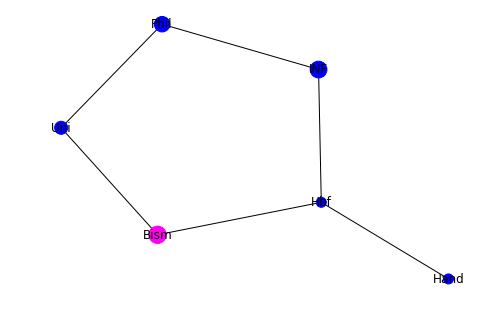

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 51} steit aus, time 52
Es sind 11 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 52


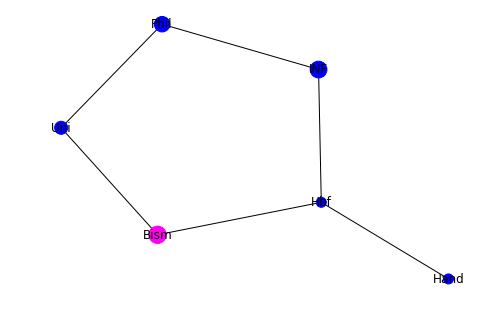

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 67} steit aus, time 52
Es sind 10 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 52


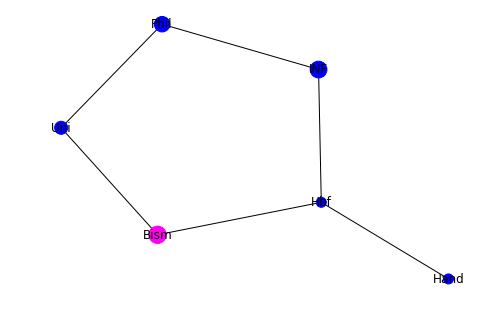

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 51} steit aus, time 52
Es sind 9 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 52


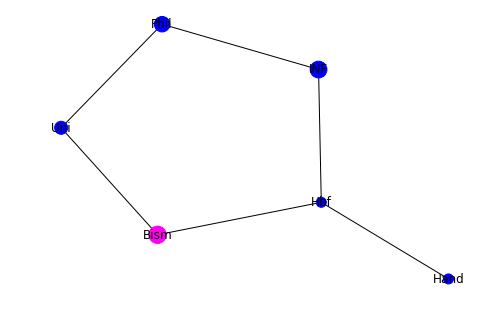

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 51} steit aus, time 52
Es sind 8 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 52


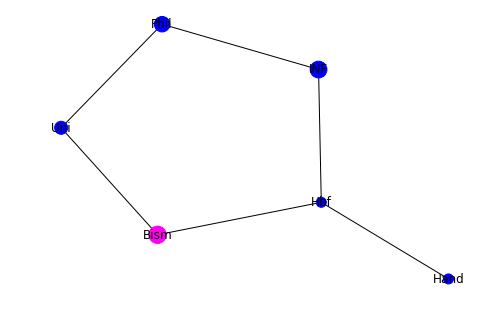

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 67} steit aus, time 52
Es sind 7 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


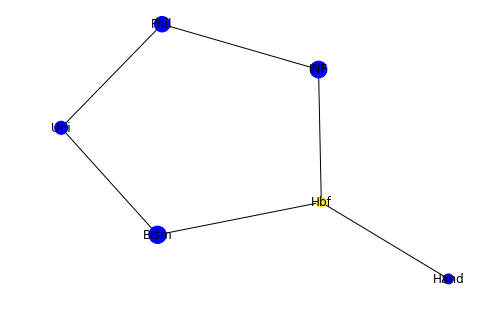

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 54
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


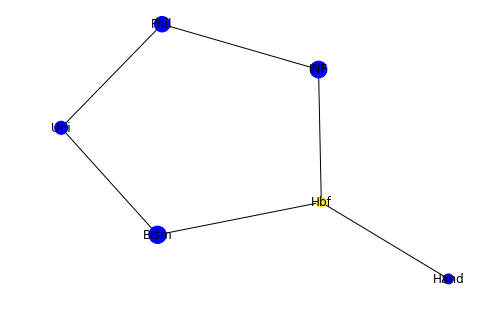

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 54
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


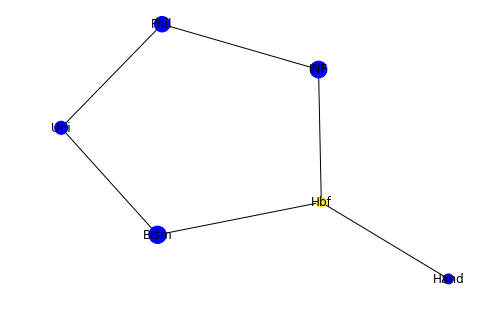

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 54
Es sind 27 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


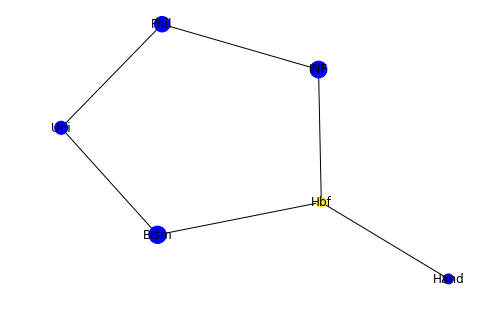

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 54
Es sind 26 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


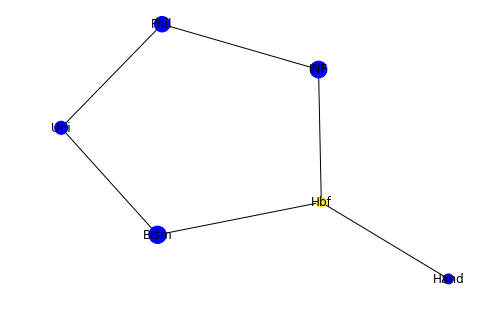

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 54
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


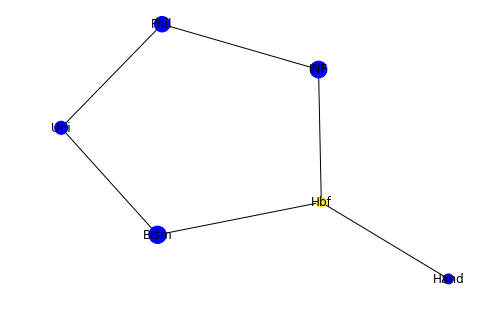

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 54
Es sind 24 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


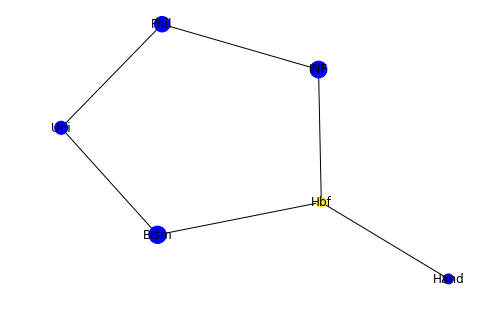

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 54} steit aus, time 54
Es sind 23 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


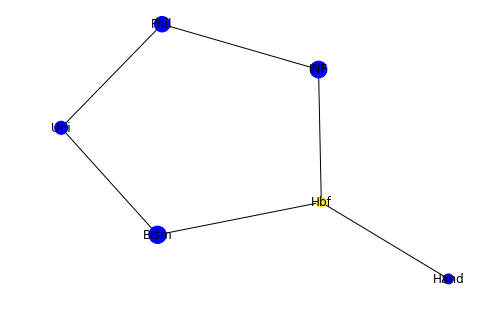

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 12} steit aus, time 54
Es sind 22 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 54


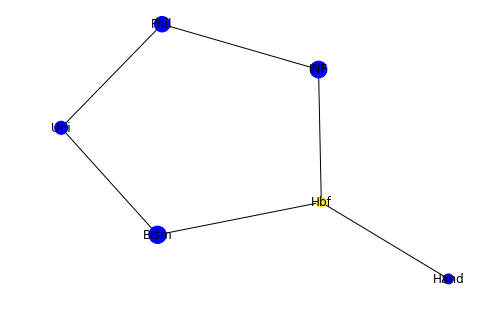

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 39} steit aus, time 54
Es sind 21 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 55


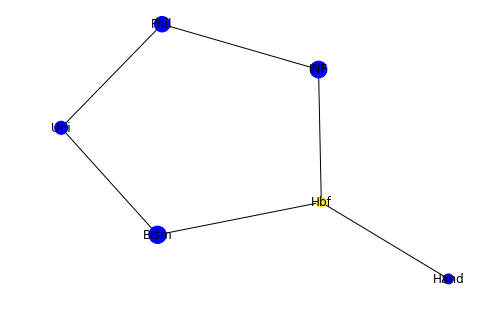

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 67} steit aus, time 55
Es sind 20 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 55


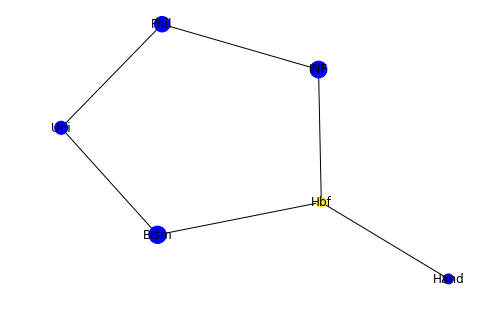

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 51} steit aus, time 55
Es sind 19 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 55


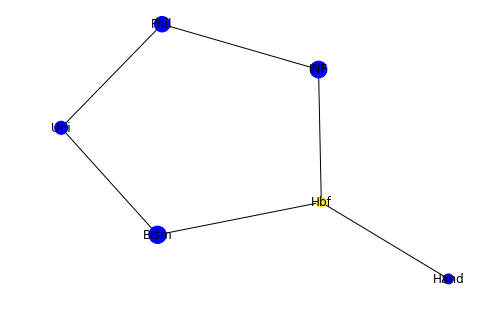

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 67} steit aus, time 55
Es sind 18 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 55


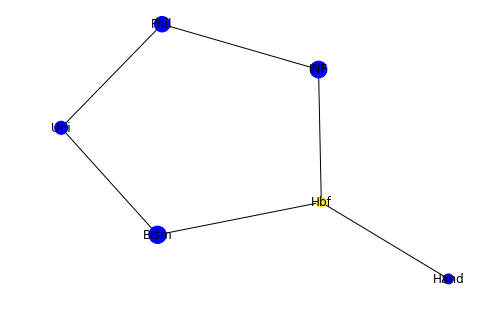

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 67} steit aus, time 55
Es sind 17 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 55


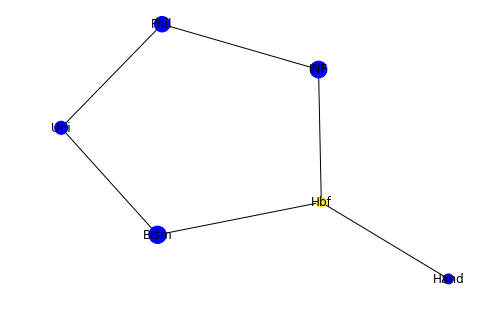

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 67} steit aus, time 55
Es sind 16 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 55


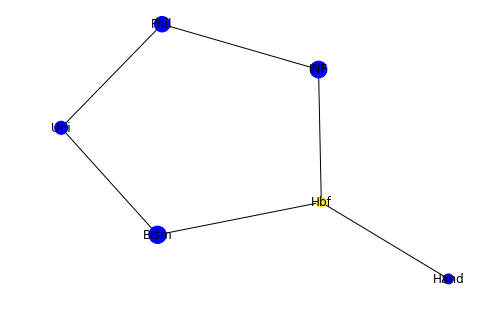

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 51} steit aus, time 55
Es sind 15 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 55


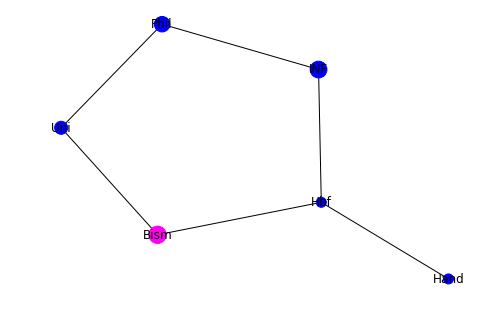

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 23 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Zielknoten ist 3, und hat die Nummer: 3, ist 4
[16, 15, 14, 13]
Exit Time: 113
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Zielknoten ist 0, und hat die Nummer: 0, ist 4
[16]
Exit Time: 71
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Zielknoten ist 1, und hat die Nummer: 1, ist 4
[16, 15]
Exit Time: 86
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Zielknoten ist 1, und hat die Nummer: 1, ist 4
[16, 15]
Exit Time: 86
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Zielknoten ist 3, und hat die Nummer: 3, ist 4
[16, 15, 14, 13]
Exit Time: 113
Warten: [0, 1, 2, 3, 4,

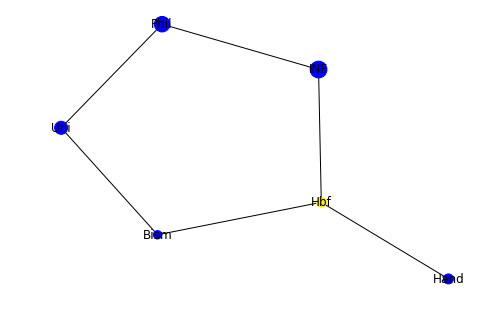

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 15 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Zielknoten ist 2, und hat die Nummer: 2, ist 4
[16, 12, 13]
Exit Time: 99
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Zielknoten ist 2, und hat die Nummer: 2, ist 4
[16, 12, 13]
Exit Time: 99
Warten: [0, 1, 2, 3, 4, 5, 6, 7]
Zielknoten ist 1, und hat die Nummer: 3, ist 4
[16, 12, 13, 14]
Exit Time: 113
Warten: [0, 1, 2, 3, 4, 5, 6]
Zielknoten ist 1, und hat die Nummer: 3, ist 4
[16, 12, 13, 14]
Exit Time: 113
Warten: [0, 1, 2, 3, 4, 5]
Zielknoten ist 1, und hat die Nummer: 3, ist 4
[16, 12, 13, 14]
Exit Time: 113
Warten: [0, 1, 2, 3, 4]
Zielknoten ist 2, und hat die Nummer: 2, ist 4
[16, 12, 13]
Exit Time: 99
Warten: [0, 1, 2, 3]
Zielknoten ist 2, und hat die Nummer: 2, ist 4
[16, 12, 13]
Exit Time: 99
Warten: [0, 1, 2]
Zielknoten ist 1, und hat die Nummer: 3, ist 4
[16, 12, 13, 14]
Exit Time: 113
Warten: [0, 1]
Zielknoten ist 2, und hat die Nummer: 2, ist 4
[16, 12, 13]
Exit Time: 99
Warten: [0]
Z

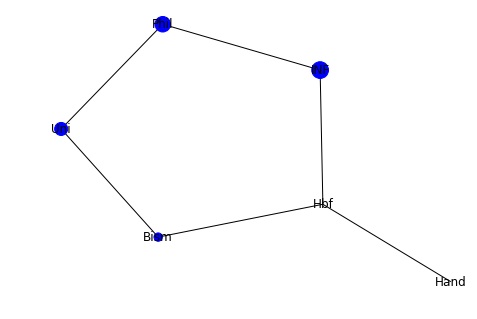

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 67} steit aus, time 67
Es sind 29 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 67


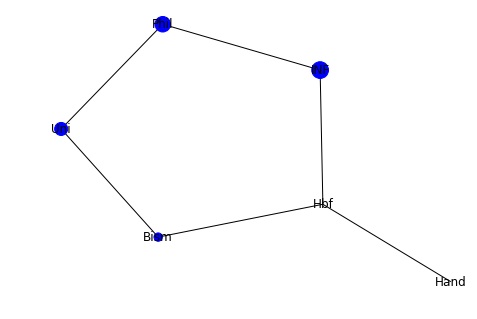

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 67} steit aus, time 67
Es sind 28 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 67


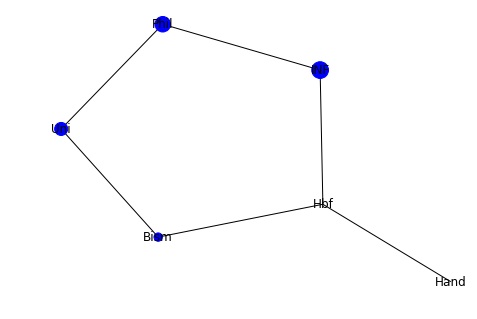

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 51} steit aus, time 67
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 67


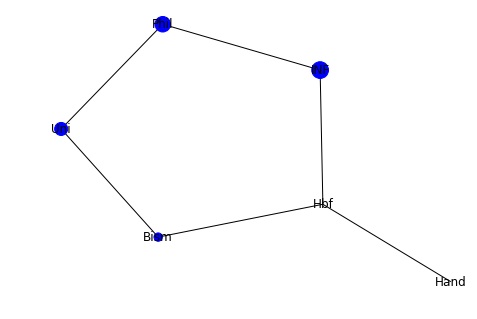

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 51} steit aus, time 67
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 67


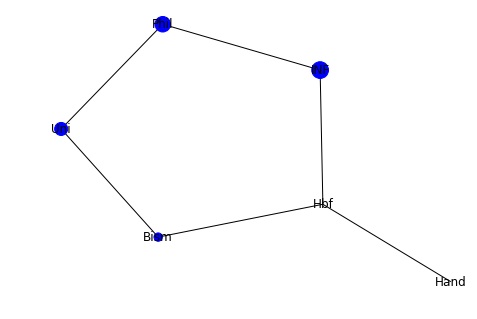

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 51} steit aus, time 67
Es sind 25 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 67


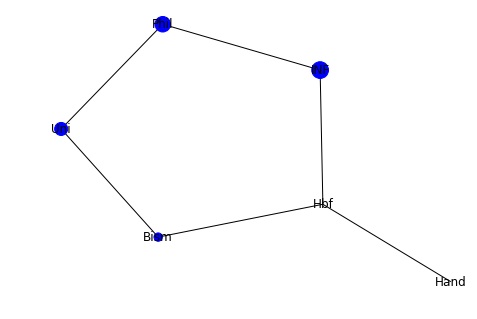

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 51} steit aus, time 67
Es sind 24 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 67


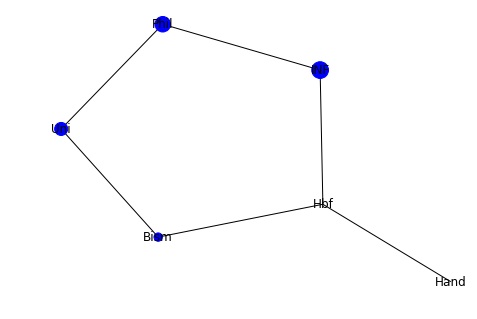

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 67} steit aus, time 67
Es sind 23 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 4, der nächste Halt 3, die aktuelle Zeit: 70


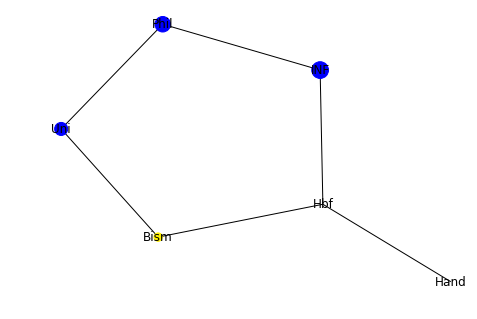

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6]
Zielknoten ist 3, und hat die Nummer: 1, ist 0
[12]
Exit Time: 82
Warten: [0, 1, 2, 3, 4, 5]
Zielknoten ist 0, und hat die Nummer: 4, ist 0
[12, 13, 14, 15]
Exit Time: 124
Warten: [0, 1, 2, 3, 4]
Zielknoten ist 0, und hat die Nummer: 4, ist 0
[12, 13, 14, 15]
Exit Time: 124
Warten: [0, 1, 2, 3]
Zielknoten ist 0, und hat die Nummer: 4, ist 0
[12, 13, 14, 15]
Exit Time: 124
Warten: [0, 1, 2]
Zielknoten ist 3, und hat die Nummer: 1, ist 0
[12]
Exit Time: 82
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 70


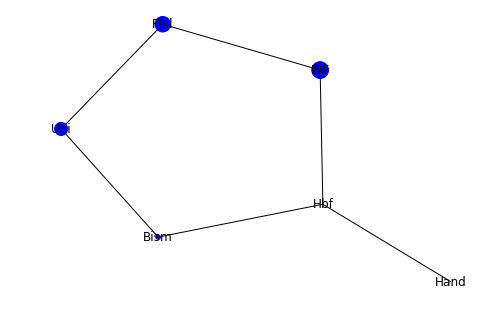

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 7 Plätze frei
Warten: []
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 71


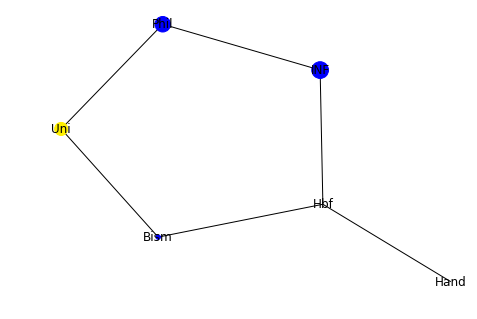

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 67} steit aus, time 71
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 71


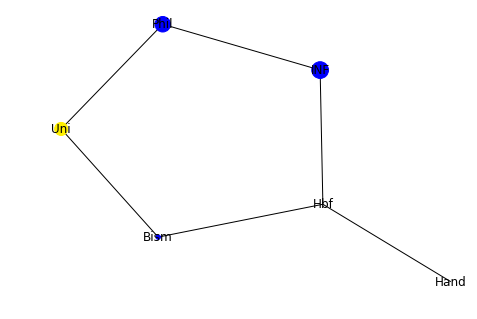

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 67} steit aus, time 71
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 71


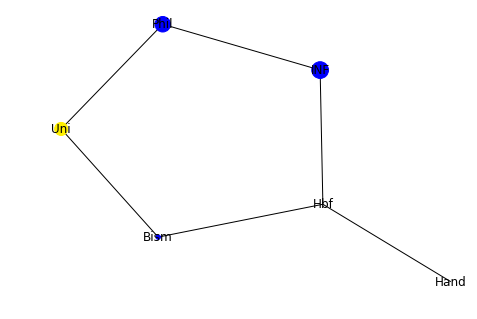

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 51} steit aus, time 71
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


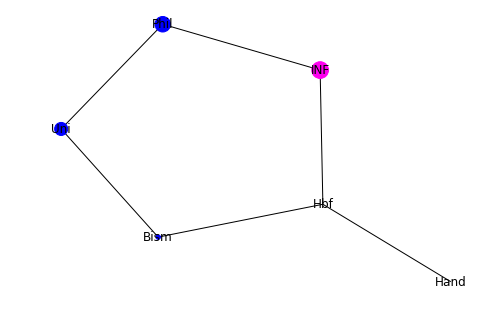

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 82} steit aus, time 71
Es sind 22 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


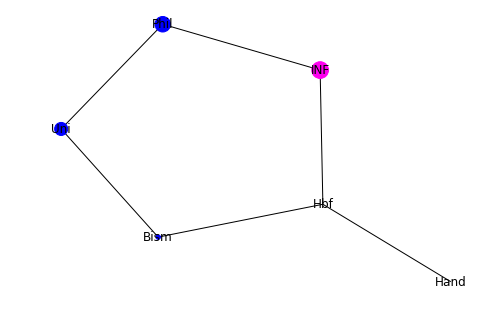

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 71
Es sind 21 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


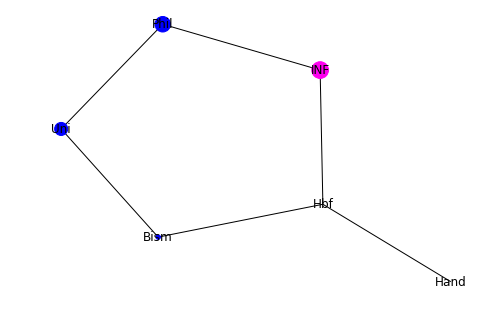

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 71
Es sind 20 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


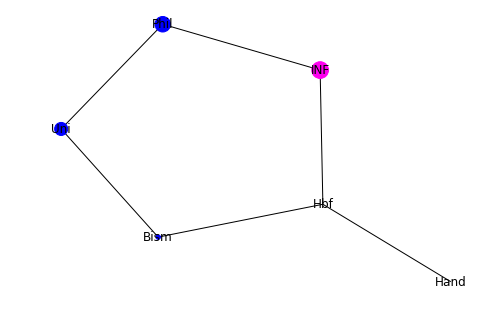

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 71
Es sind 19 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


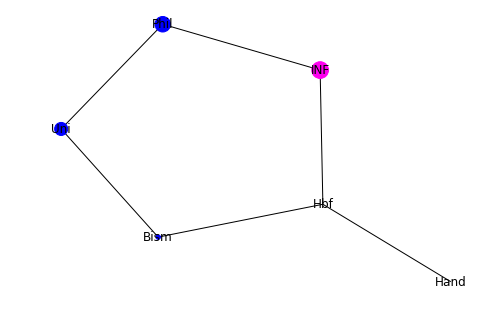

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 82} steit aus, time 71
Es sind 18 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


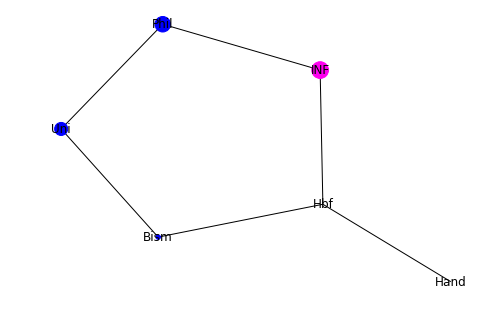

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 82} steit aus, time 71
Es sind 17 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


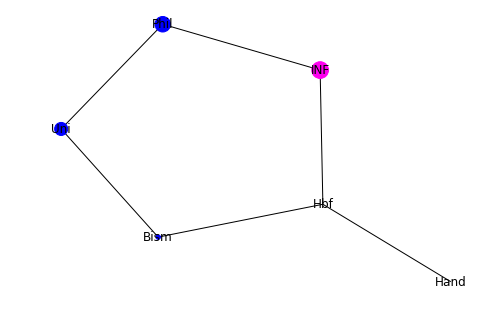

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 82} steit aus, time 71
Es sind 16 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 71


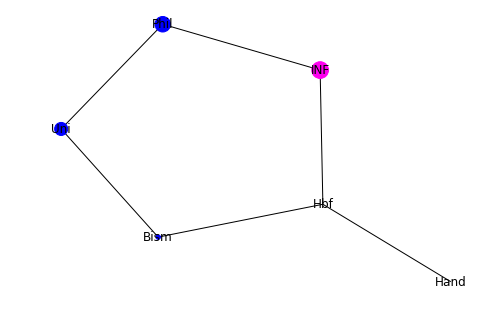

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 71
Es sind 15 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 82


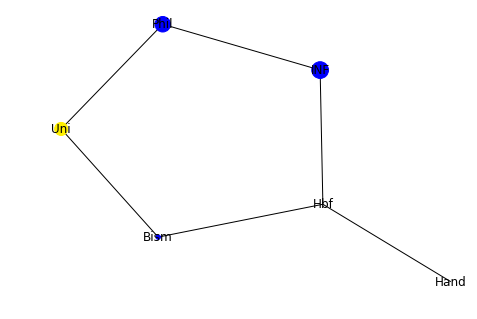

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 98} steit aus, time 82
Es sind 26 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 82


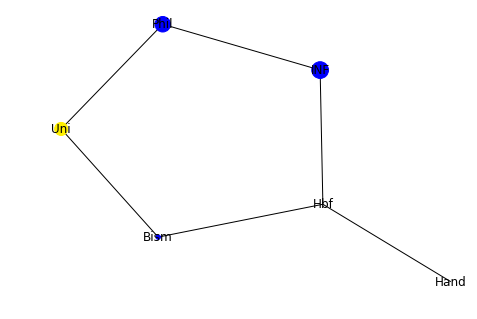

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 85} steit aus, time 82
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 83


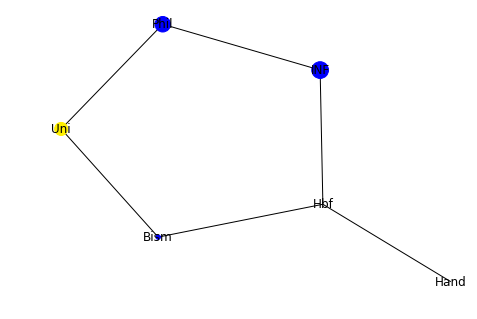

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Zielknoten ist 4, und hat die Nummer: 0, ist 1
[13, 14, 15, 16]
Exit Time: 141
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Zielknoten ist 4, und hat die Nummer: 0, ist 1
[13, 14, 15, 16]
Exit Time: 141
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Zielknoten ist 0, und hat die Nummer: 4, ist 1
[13, 14, 15]
Exit Time: 125
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Zielknoten ist 4, und hat die Nummer: 0, ist 1
[13, 14, 15, 16]
Exit Time: 141
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Zielknoten ist 0, und hat die Nummer: 4, ist 1
[13, 14, 15]
Exit Time: 125
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 84


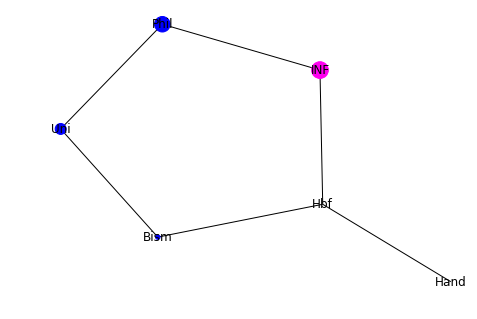

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 15 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Zielknoten ist 2, und hat die Nummer: 2, ist 1
[14]
Exit Time: 98
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Zielknoten ist 2, und hat die Nummer: 2, ist 1
[14]
Exit Time: 98
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Zielknoten ist 3, und hat die Nummer: 3, ist 1
[14, 13]
Exit Time: 111
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Zielknoten ist 2, und hat die Nummer: 2, ist 1
[14]
Exit Time: 98
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Zielknoten ist 2, und hat die Nummer: 2, ist 1
[14]
Exit Time: 98
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Z

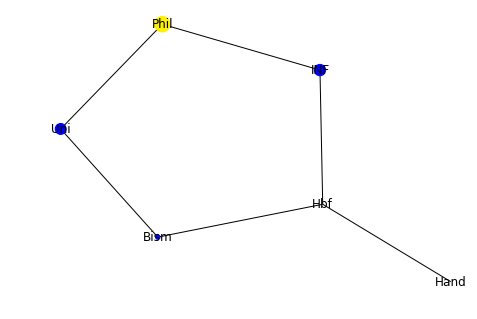

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 111} steit aus, time 85
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 85


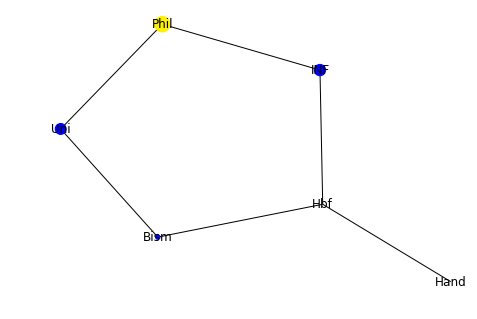

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 111} steit aus, time 85
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 85


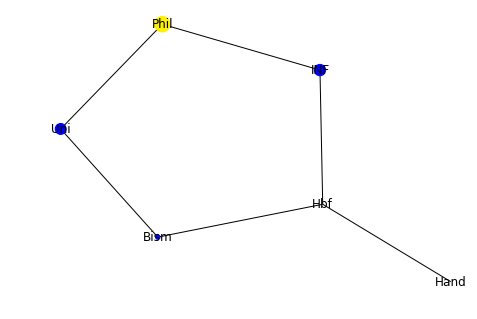

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 111} steit aus, time 85
Es sind 27 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 85


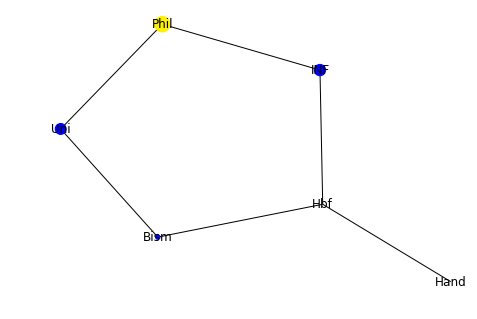

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 111} steit aus, time 85
Es sind 26 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 85


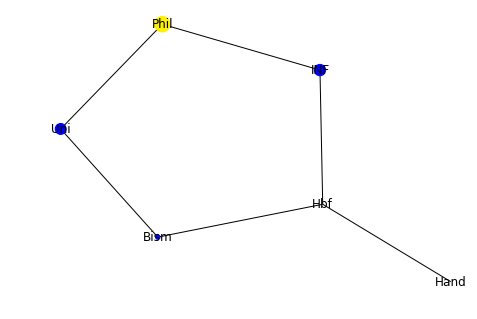

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 111} steit aus, time 85
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 85


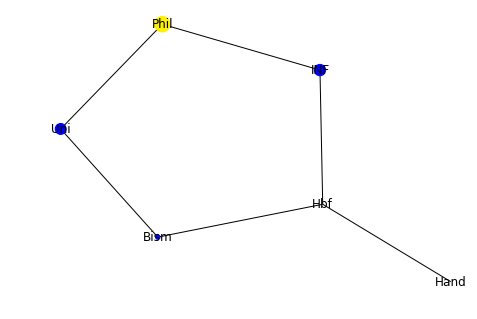

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 111} steit aus, time 85
Es sind 24 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 85


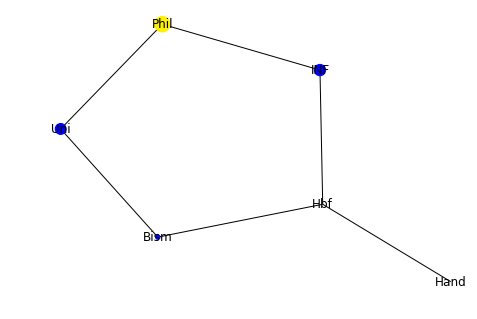

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 98} steit aus, time 85
Es sind 23 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 85


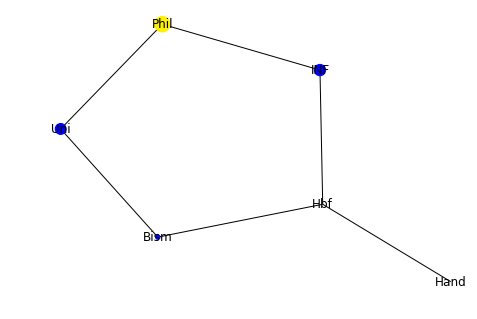

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 98} steit aus, time 85
Es sind 22 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


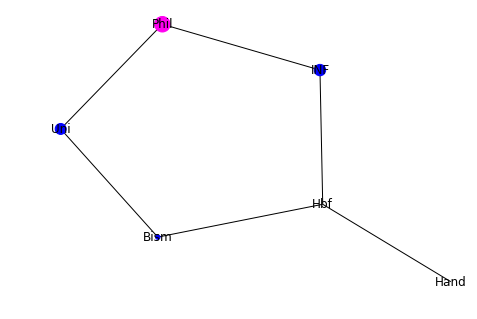

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 86
Es sind 29 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


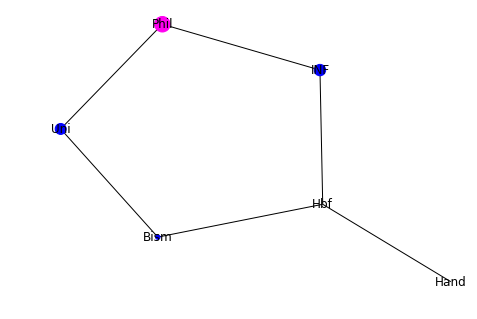

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 86
Es sind 28 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


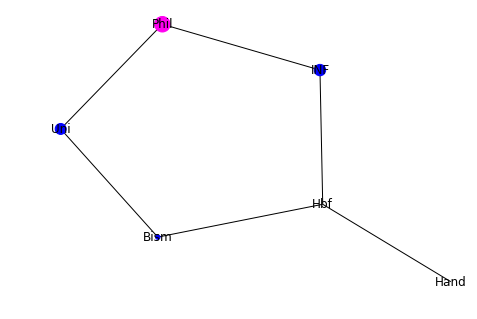

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 82} steit aus, time 86
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


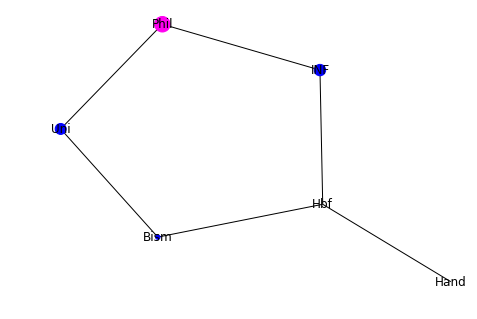

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 86
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


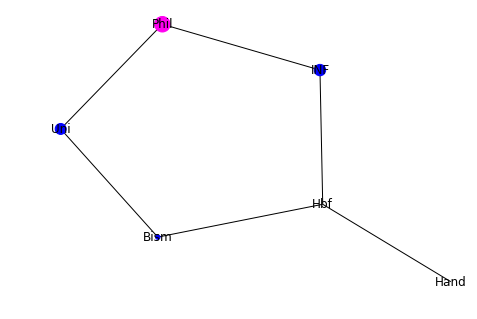

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 86
Es sind 25 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


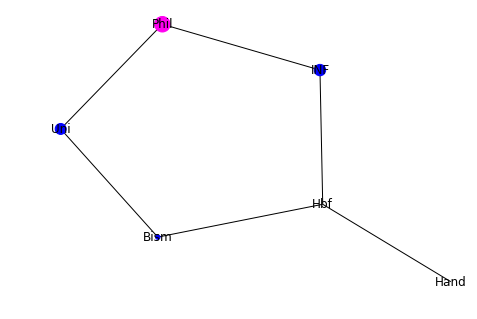

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 86
Es sind 24 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


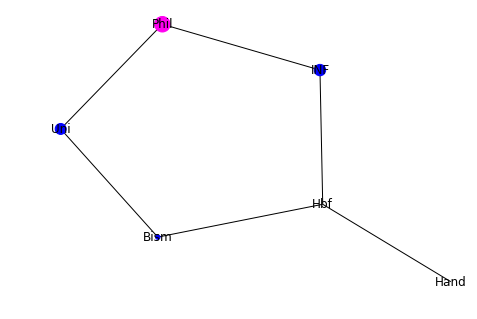

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 86
Es sind 23 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 86


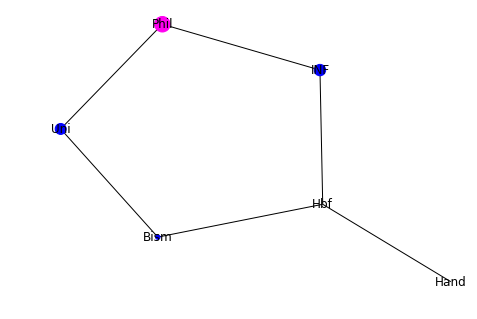

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 86
Es sind 22 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 97


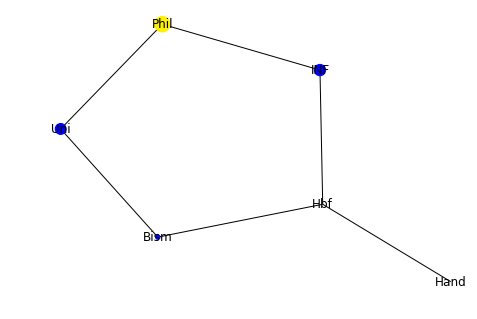

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 8 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 154
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 154
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 154
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 154
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 154
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Zielknoten ist 4, und hat die Nummer: 

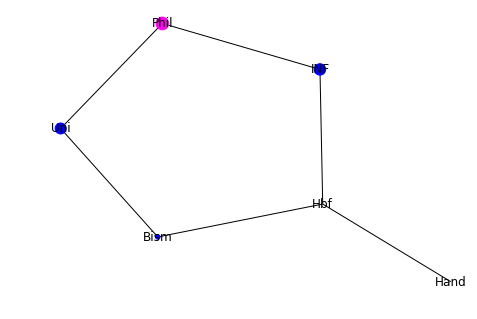

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 8 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 122
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 122
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 122
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 122
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 122
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 122
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 12]
Exit Time: 122
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Zielknoten ist 4, und hat die Nummer: 4, ist 2
[13, 1

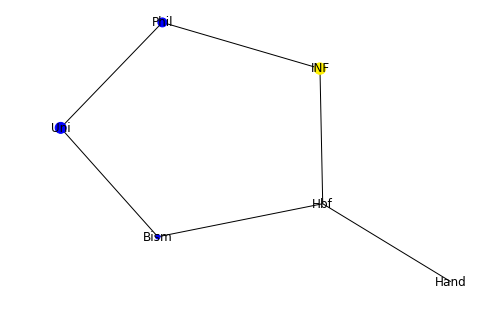

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 98} steit aus, time 98
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 98


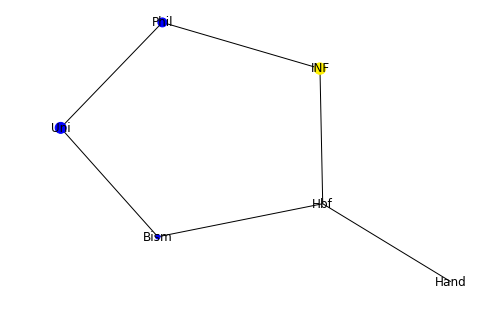

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 111} steit aus, time 98
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 98


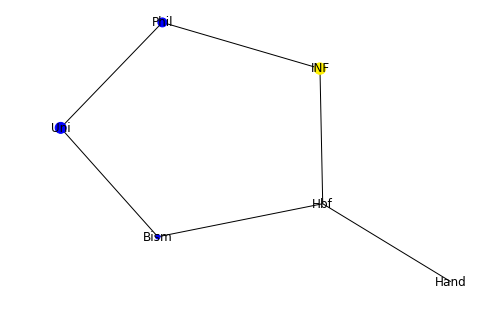

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 99} steit aus, time 98
Es sind 27 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 98


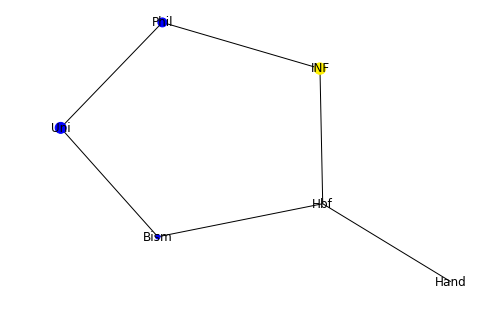

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 99} steit aus, time 98
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


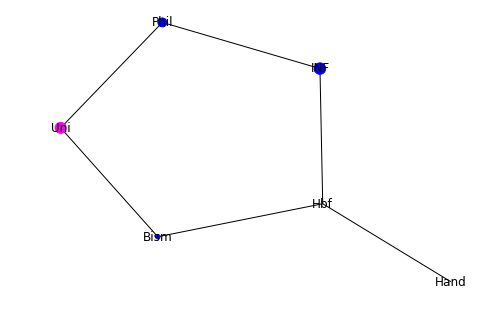

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 98
Es sind 29 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


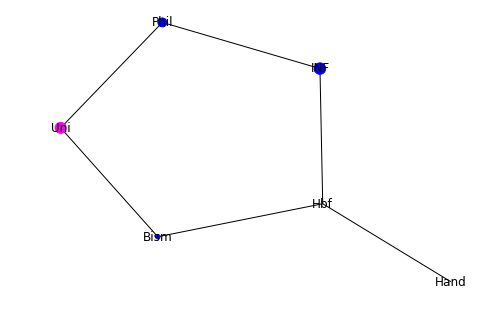

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 98
Es sind 28 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


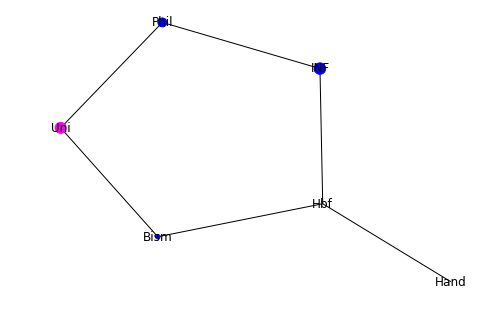

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 98
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


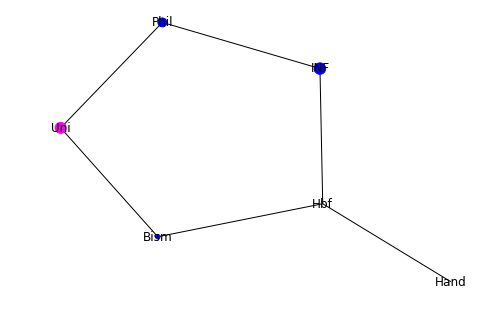

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 124} steit aus, time 98
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


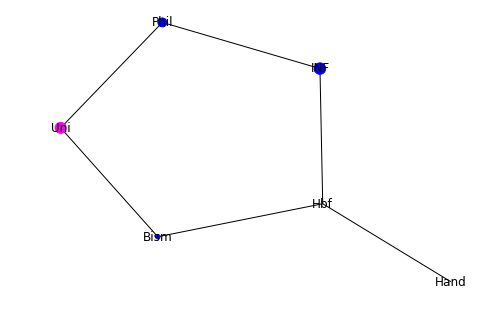

acton: exit
Fahrzeug 1, Passagier {'station': 1, 'exit_time': 86} steit aus, time 98
Es sind 25 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


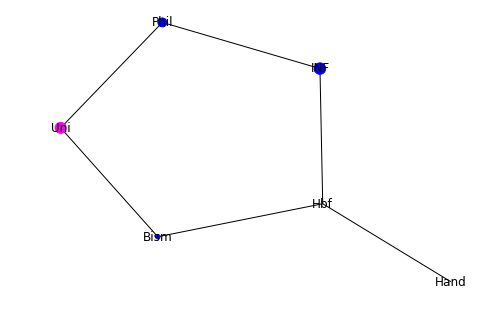

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 82} steit aus, time 98
Es sind 24 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


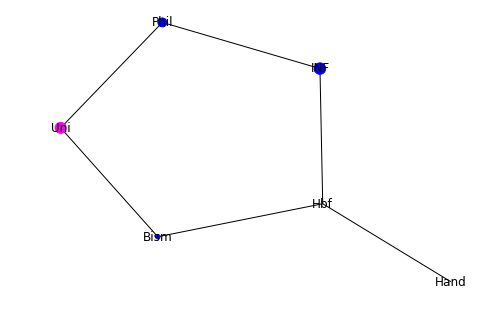

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 82} steit aus, time 98
Es sind 23 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


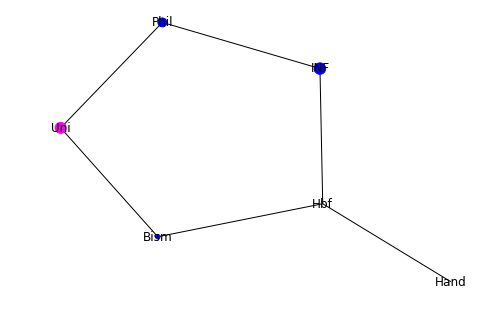

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 98} steit aus, time 98
Es sind 22 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


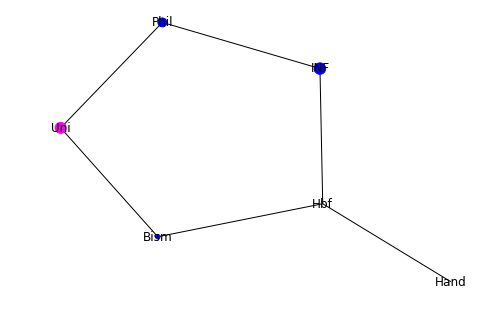

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 98} steit aus, time 98
Es sind 21 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 98


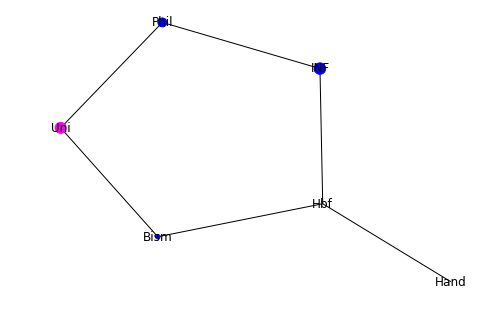

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 111} steit aus, time 98
Es sind 20 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 99


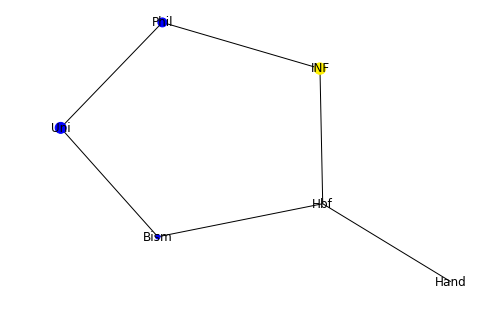

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 113} steit aus, time 99
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 99


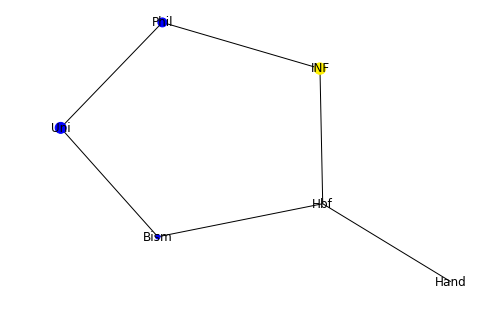

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 113} steit aus, time 99
Es sind 24 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 99


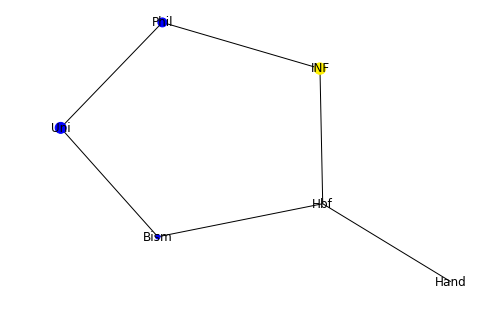

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 113} steit aus, time 99
Es sind 23 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 99


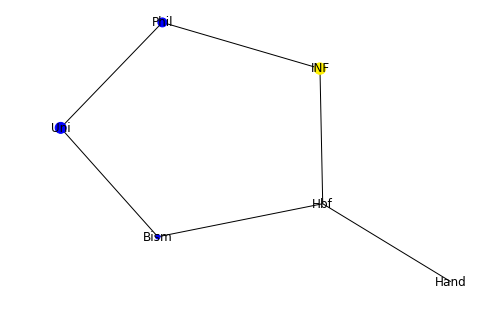

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 99} steit aus, time 99
Es sind 22 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 99


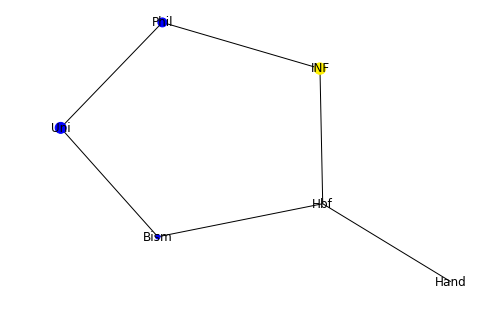

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 99} steit aus, time 99
Es sind 21 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 99


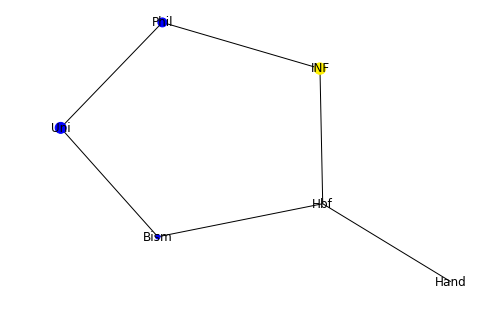

acton: exit
Fahrzeug 0, Passagier {'station': 1, 'exit_time': 113} steit aus, time 99
Es sind 20 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 109


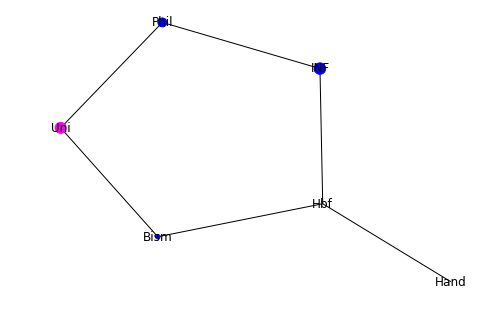

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 10 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Zielknoten ist 4, und hat die Nummer: 4, ist 3
[12]
Exit Time: 121
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Zielknoten ist 4, und hat die Nummer: 4, ist 3
[12]
Exit Time: 121
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Zielknoten ist 0, und hat die Nummer: 0, ist 3
[12, 16]
Exit Time: 137
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Zielknoten ist 0, und hat die Nummer: 0, ist 3
[12, 16]
Exit Time: 137
Warten: [0, 1, 2, 3, 4, 5, 6, 7]
Zielknoten ist 4, und hat die Nummer: 4, ist 3
[12]
Exit Time: 121
Warten: [0, 1, 2, 3, 4, 5, 6]
Zielknoten ist 4, und hat die Nummer: 4, ist 3
[12]
Exit Time: 121
Warten: [0, 1, 2, 3, 4, 5]
Zielknoten ist 0, und hat die Nummer: 0, ist 3
[12, 16]
Exit Time: 137
Warten: [0, 1, 2, 3, 4]
Zielknoten ist 4, und hat die Nummer: 4, ist 3
[12]
Exit Time: 121
Warten: [0, 1, 2, 3]
Zielknoten ist 0, und hat die Nummer: 0, ist 3
[12, 16]
Exit Time: 137
Warten: [0, 1, 2]
Zielk

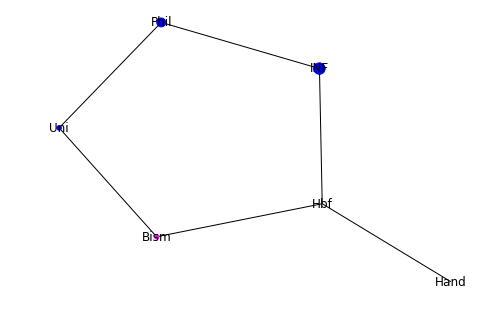

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 98} steit aus, time 111
Es sind 29 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 111


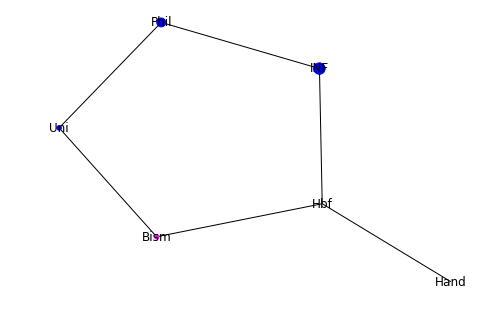

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 98} steit aus, time 111
Es sind 28 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 111


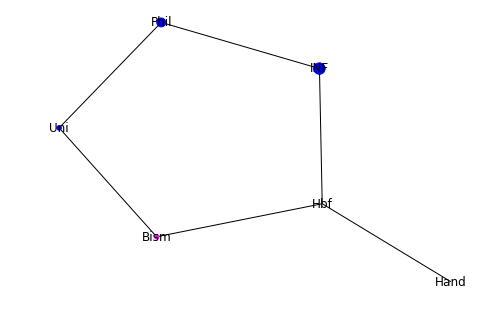

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 98} steit aus, time 111
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 111


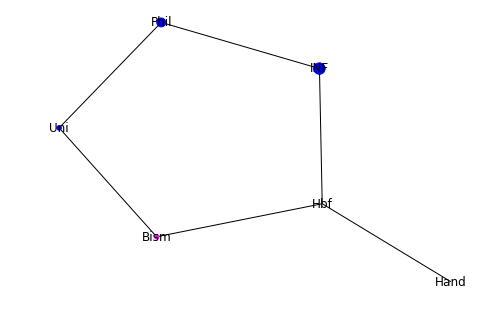

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 98} steit aus, time 111
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 111


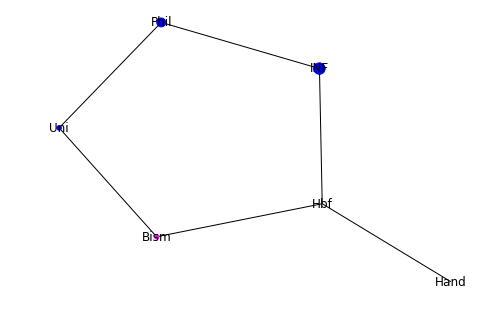

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 111} steit aus, time 111
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 112


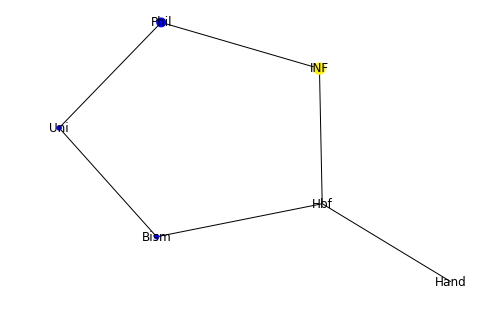

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 10 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Zielknoten ist 3, und hat die Nummer: 1, ist 3
[15, 16, 12]
Exit Time: 155
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Zielknoten ist 3, und hat die Nummer: 1, ist 3
[15, 16, 12]
Exit Time: 155
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Zielknoten ist 3, und hat die Nummer: 1, ist 3
[15, 16, 12]
Exit Time: 155
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Zielknoten ist 2, und hat die Nummer: 2, ist 3
[15, 16, 12, 13]
Exit Time: 168
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Zielknoten ist 3, und hat die Nummer: 1, ist 3
[15, 16, 12]
Exit Time: 155
Warten: [0, 1, 2, 3, 4, 5, 6, 7]
Zielknoten ist 2, und hat die Nummer: 2, ist 3
[15, 16, 12, 13]
Exit Time: 168
Warten: [0, 1, 2, 3, 4, 5, 6]
Zielknoten ist 2, und hat die Nummer: 2, ist 3
[15, 16, 12, 13]
Exit Time: 168
Warten: [0, 1, 2, 3, 4, 5]
Zielknoten ist 2, und hat die Nummer: 2, ist 3
[15, 16, 12, 13]
Exit Time: 168
Warten: [0, 1, 2, 3,

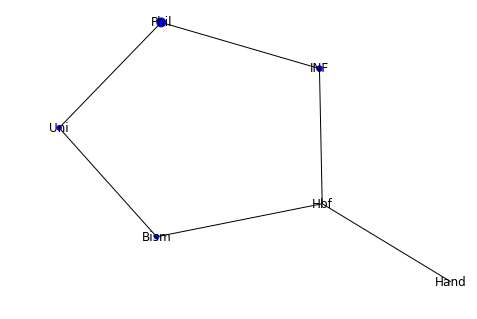

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 99} steit aus, time 113
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 113


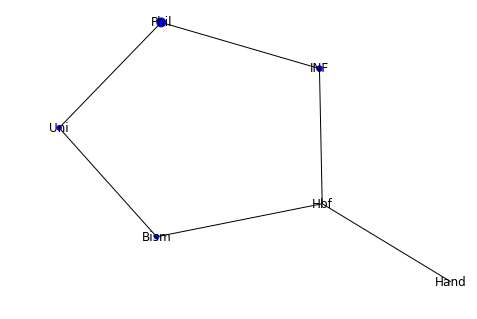

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 99} steit aus, time 113
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 113


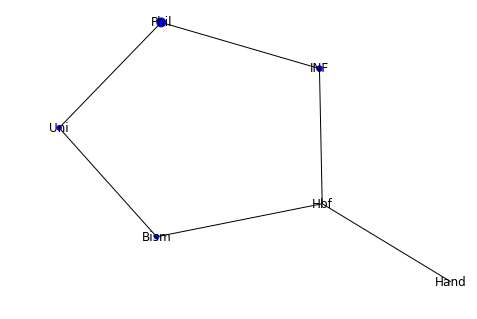

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 82} steit aus, time 113
Es sind 27 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 113


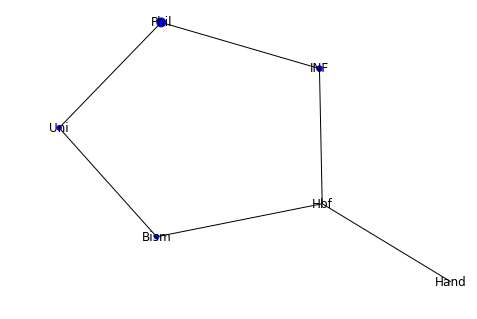

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 124} steit aus, time 113
Es sind 26 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 113


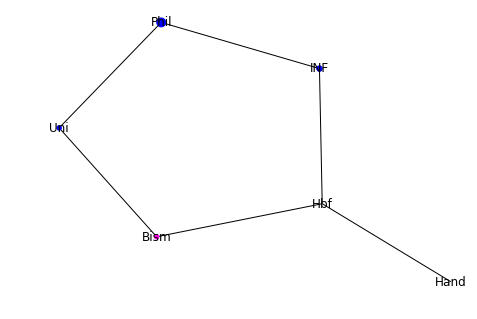

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 168} steit aus, time 113
Es sind 24 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 113


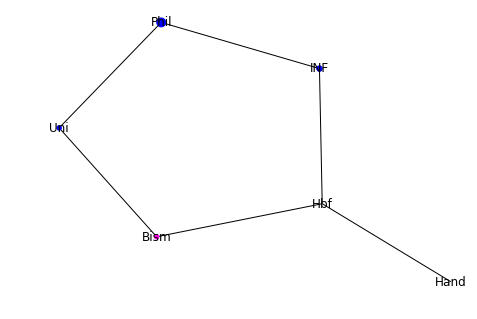

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 168} steit aus, time 113
Es sind 23 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 113


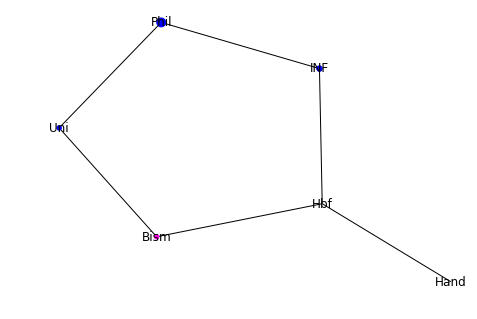

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 155} steit aus, time 113
Es sind 22 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 113


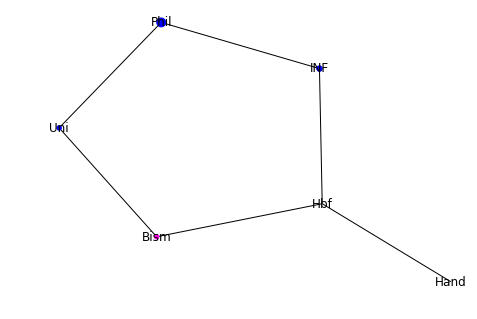

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 155} steit aus, time 113
Es sind 21 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 113


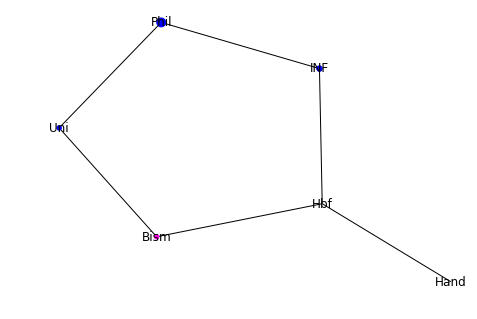

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 155} steit aus, time 113
Es sind 20 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 113


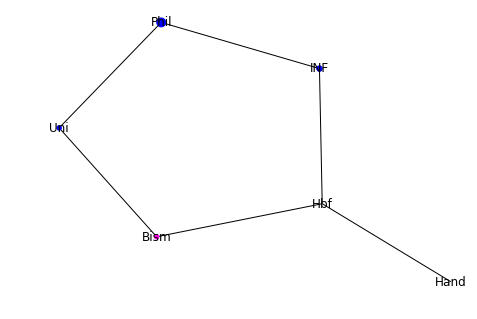

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 168} steit aus, time 113
Es sind 19 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 113


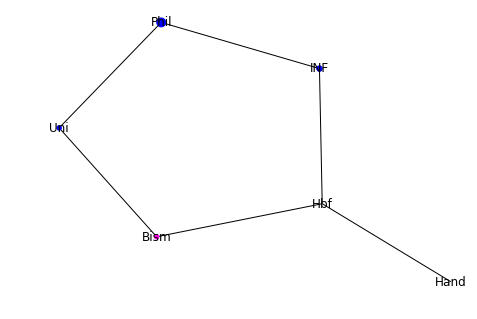

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 168} steit aus, time 113
Es sind 18 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 121


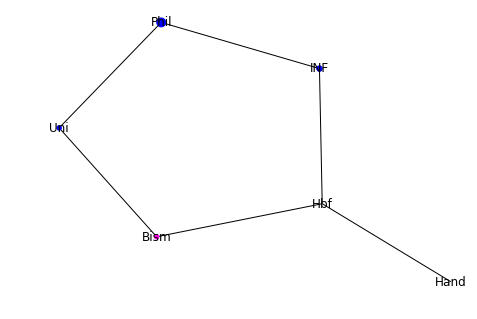

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 121
Es sind 17 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 121


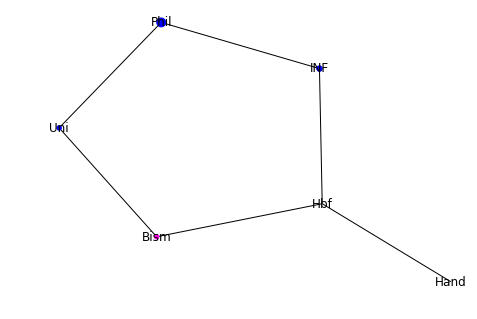

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 121
Es sind 16 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 121


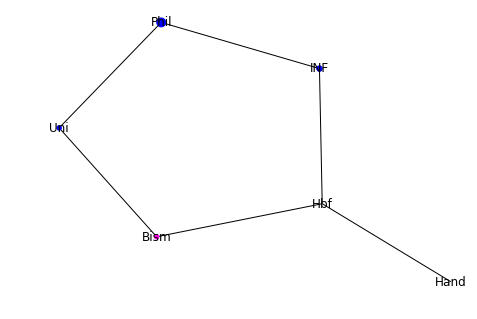

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 121
Es sind 15 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 121


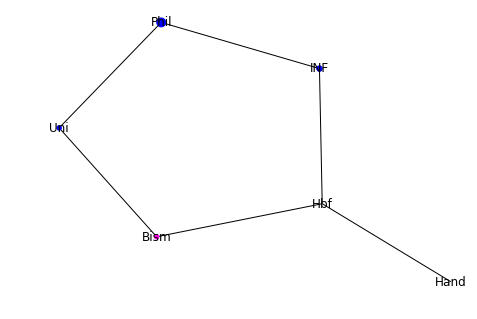

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 121
Es sind 14 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 121


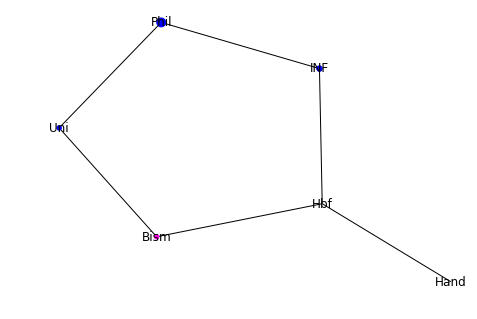

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 121
Es sind 13 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 121


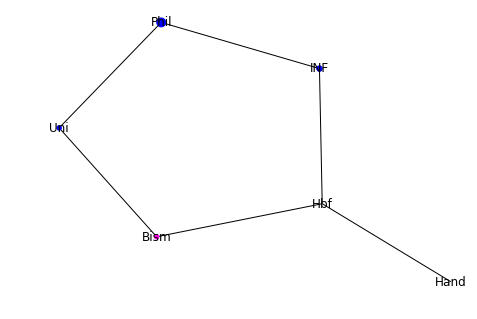

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 121
Es sind 12 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


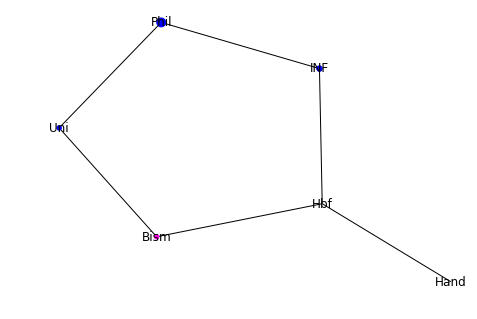

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 122
Es sind 11 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


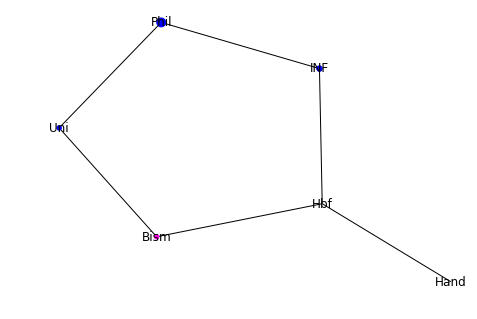

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 122} steit aus, time 122
Es sind 10 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


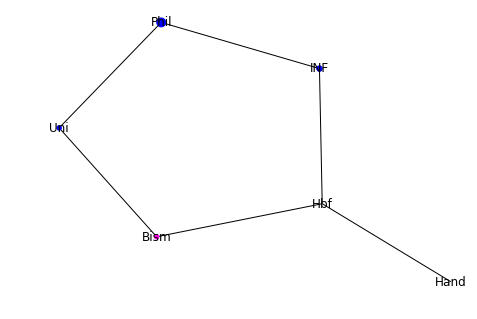

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 121} steit aus, time 122
Es sind 9 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


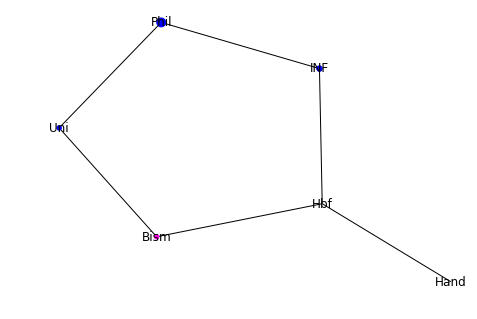

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 121} steit aus, time 122
Es sind 8 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


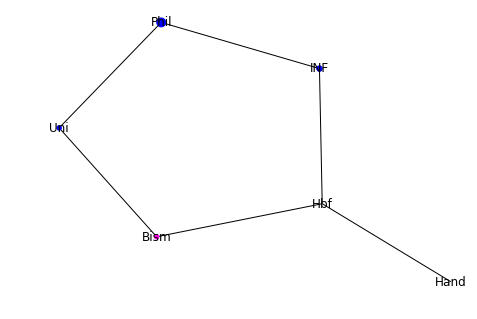

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 137} steit aus, time 122
Es sind 7 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


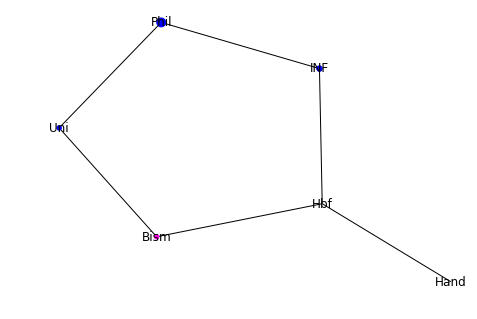

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 137} steit aus, time 122
Es sind 6 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


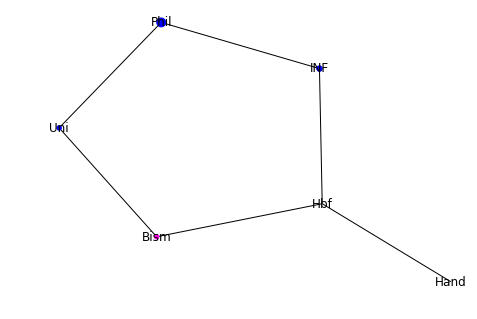

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 121} steit aus, time 122
Es sind 5 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 122


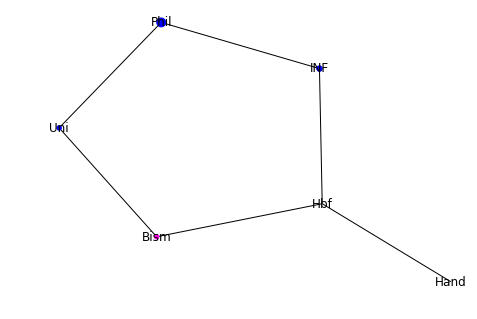

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 121} steit aus, time 122
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 124


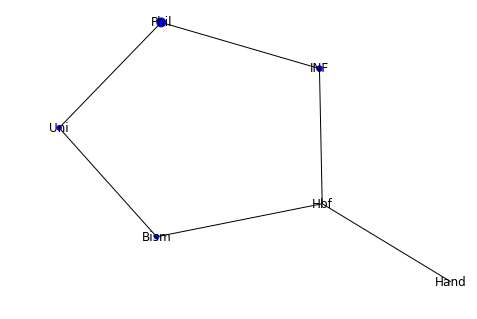

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 124} steit aus, time 124
Es sind 25 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 124


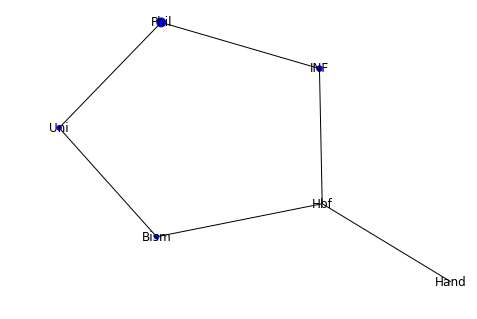

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 124} steit aus, time 124
Es sind 24 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 124


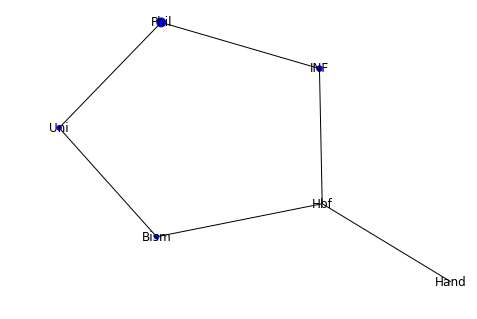

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 82} steit aus, time 124
Es sind 23 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 125


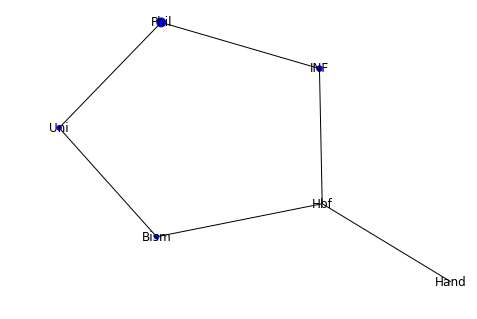

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 121} steit aus, time 125
Es sind 22 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 125


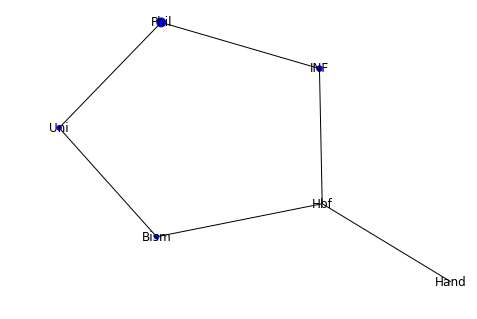

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 121} steit aus, time 125
Es sind 21 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 125


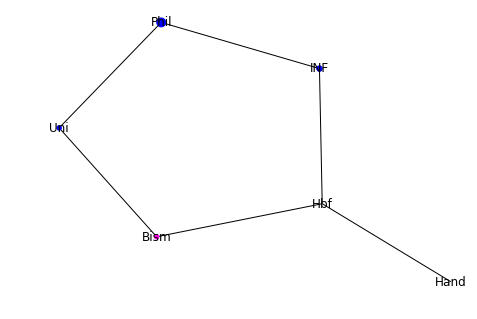

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 26 Plätze frei
Warten: [0, 1]
Zielknoten ist 3, und hat die Nummer: 3, ist 4
[16, 15, 14, 13]
Exit Time: 183
Warten: [0]
Zielknoten ist 3, und hat die Nummer: 3, ist 4
[16, 15, 14, 13]
Exit Time: 183
Warten: []
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 128


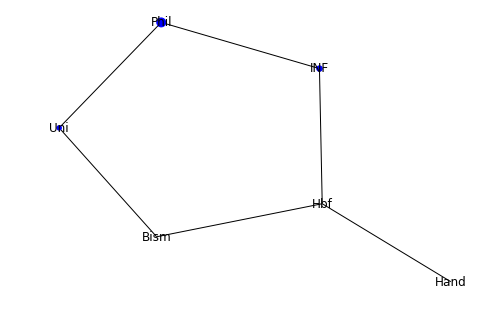

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 9 Plätze frei
Warten: []
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 137


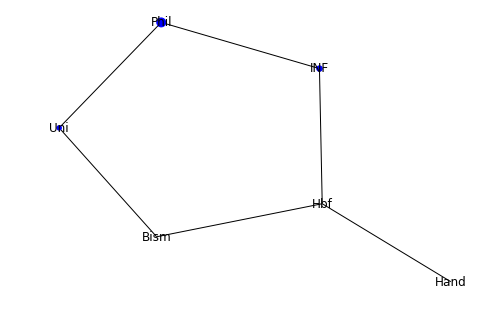

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 137} steit aus, time 137
Es sind 5 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 137


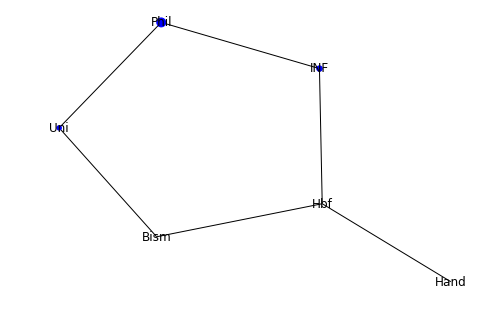

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 121} steit aus, time 137
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 137


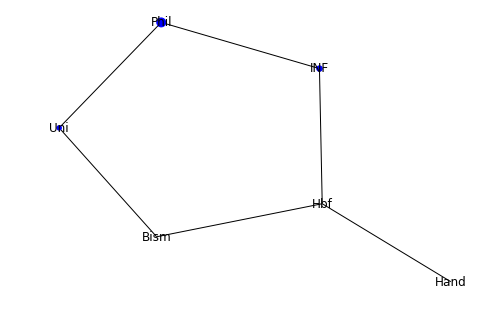

acton: exit
Fahrzeug 1, Passagier {'station': 0, 'exit_time': 137} steit aus, time 137
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 137


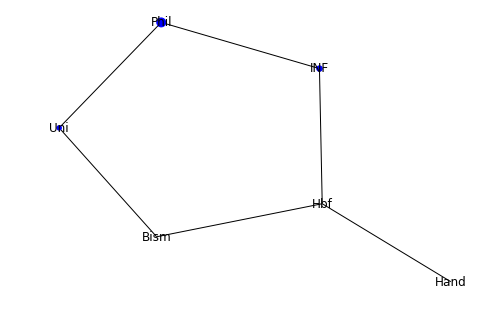

acton: exit
Fahrzeug 1, Passagier {'station': 4, 'exit_time': 121} steit aus, time 137
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 4, der nächste Halt 3, die aktuelle Zeit: 140


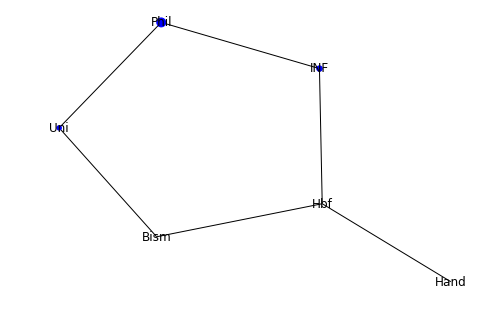

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 9 Plätze frei
Warten: []
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 140


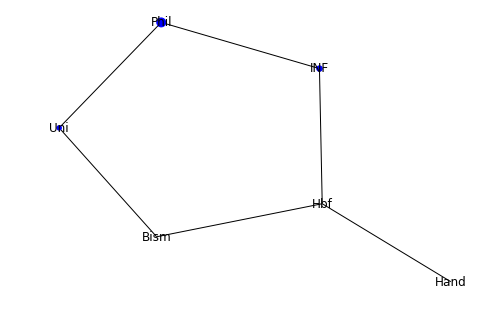

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 28 Plätze frei
Warten: []
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 141


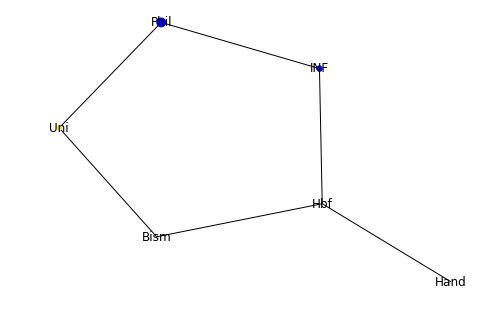

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 137} steit aus, time 141
Es sind 20 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 141


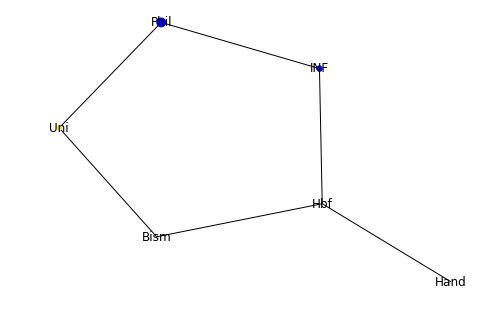

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 121} steit aus, time 141
Es sind 19 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 141


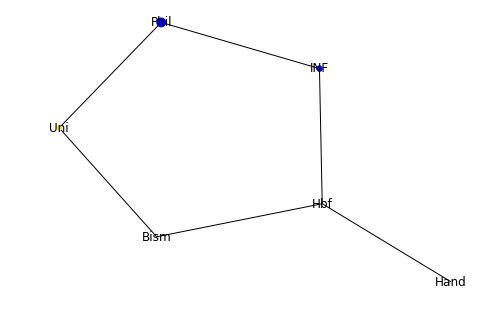

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 137} steit aus, time 141
Es sind 18 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 142


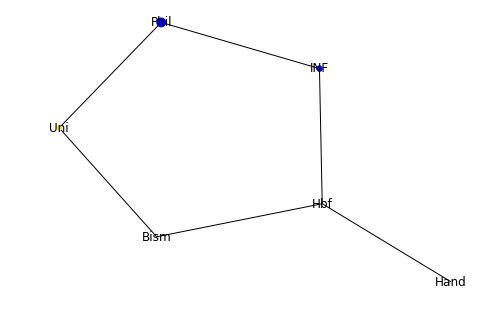

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 154} steit aus, time 142
Es sind 17 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 153


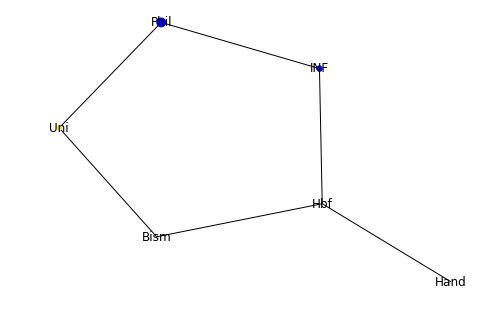

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 13 Plätze frei
Warten: [0, 1]
Zielknoten ist 0, und hat die Nummer: 4, ist 1
[13, 14, 15]
Exit Time: 195
Warten: [0]
Zielknoten ist 4, und hat die Nummer: 0, ist 1
[13, 14, 15, 16]
Exit Time: 211
Warten: []
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 154


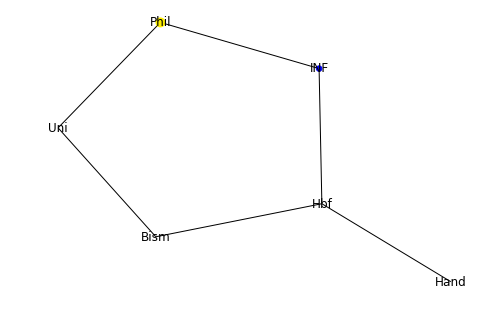

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 154} steit aus, time 154
Es sind 18 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 154


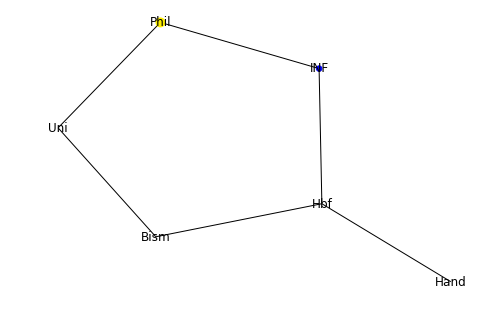

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 154} steit aus, time 154
Es sind 17 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 154


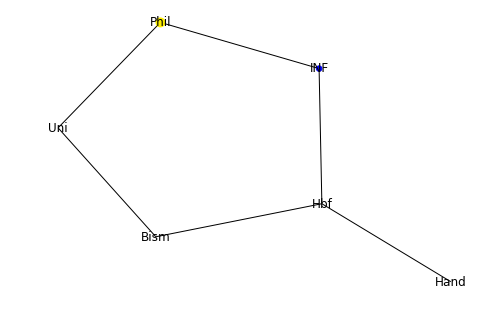

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 154} steit aus, time 154
Es sind 16 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 154


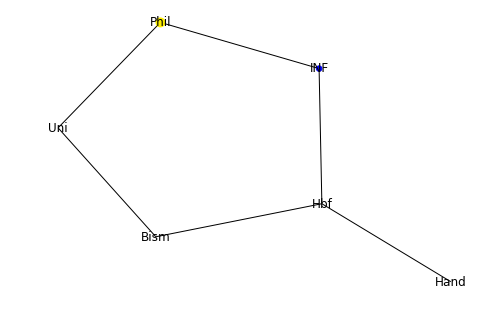

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 154} steit aus, time 154
Es sind 15 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 154


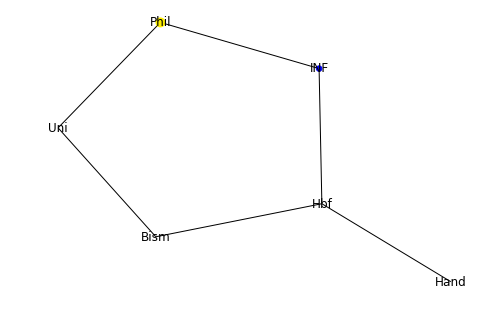

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 122} steit aus, time 154
Es sind 14 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 154


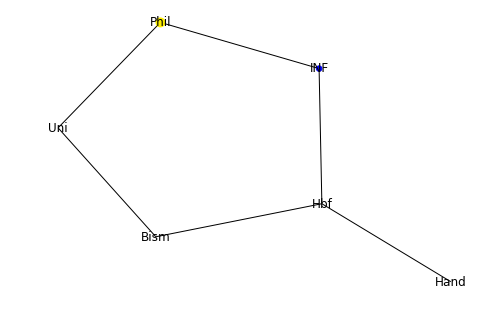

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 154} steit aus, time 154
Es sind 13 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 154


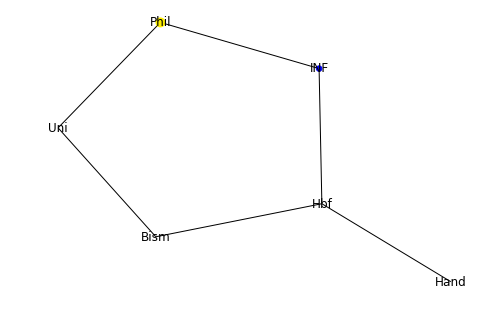

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 154} steit aus, time 154
Es sind 12 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2, die aktuelle Zeit: 154


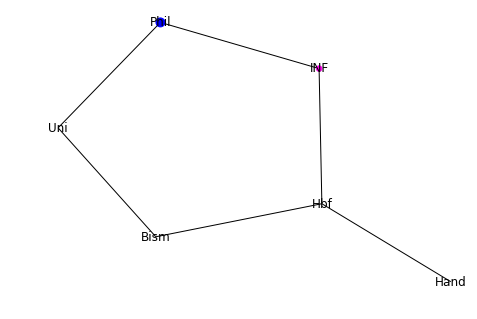

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 28 Plätze frei
Warten: [0, 1, 2]
Zielknoten ist 2, und hat die Nummer: 2, ist 1
[14]
Exit Time: 168
Warten: [0, 1]
Zielknoten ist 3, und hat die Nummer: 3, ist 1
[14, 13]
Exit Time: 181
Warten: [0]
Zielknoten ist 3, und hat die Nummer: 3, ist 1
[14, 13]
Exit Time: 181
Warten: []
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 155


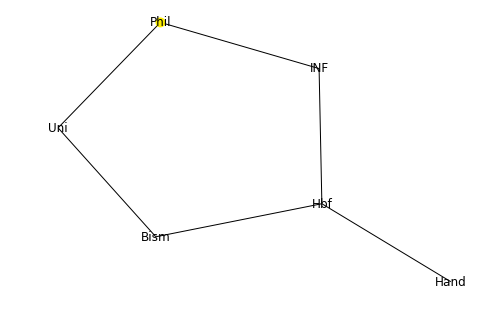

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 181} steit aus, time 155
Es sind 11 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 155


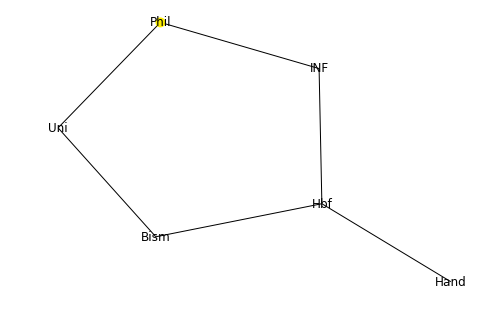

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 181} steit aus, time 155
Es sind 10 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 155


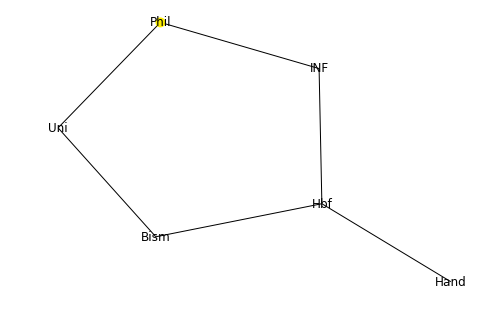

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 181} steit aus, time 155
Es sind 9 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 155


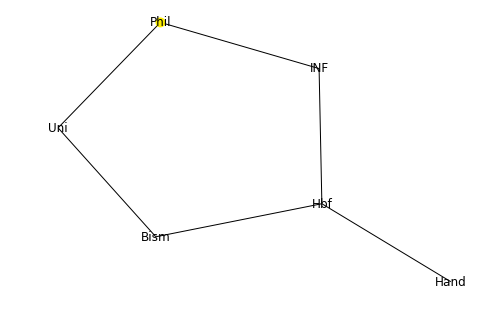

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 168} steit aus, time 155
Es sind 8 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 155


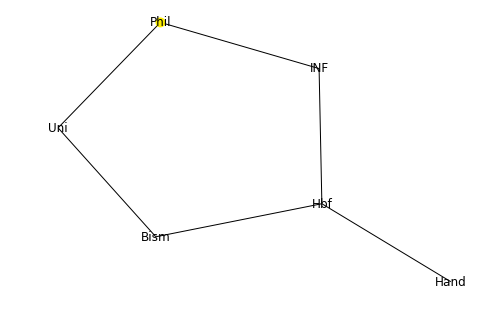

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 181} steit aus, time 155
Es sind 7 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 167


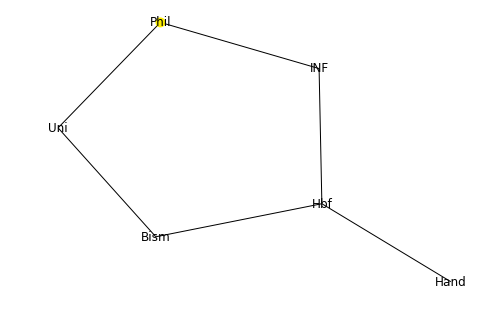

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 23 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7]
Zielknoten ist 4, und hat die Nummer: 0, ist 2
[14, 15, 16]
Exit Time: 212
Warten: [0, 1, 2, 3, 4, 5, 6]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 224
Warten: [0, 1, 2, 3, 4, 5]
Zielknoten ist 4, und hat die Nummer: 0, ist 2
[14, 15, 16]
Exit Time: 212
Warten: [0, 1, 2, 3, 4]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 224
Warten: [0, 1, 2, 3]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 224
Warten: [0, 1, 2]
Zielknoten ist 3, und hat die Nummer: 1, ist 2
[14, 15, 16, 12]
Exit Time: 224
Warten: [0, 1]
Zielknoten ist 4, und hat die Nummer: 0, ist 2
[14, 15, 16]
Exit Time: 212
Warten: [0]
Zielknoten ist 4, und hat die Nummer: 0, ist 2
[14, 15, 16]
Exit Time: 212
Warten: []
Fahrzeug 1 ist am Knoten 2, der nächste Halt 3, die aktuelle Zeit: 167


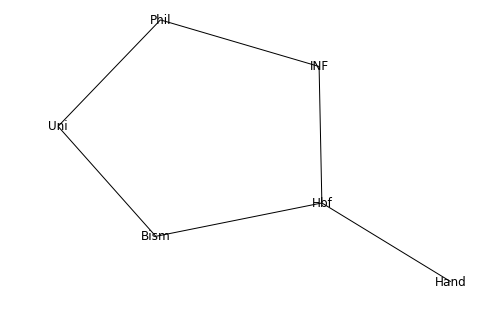

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 25 Plätze frei
Warten: []
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 168


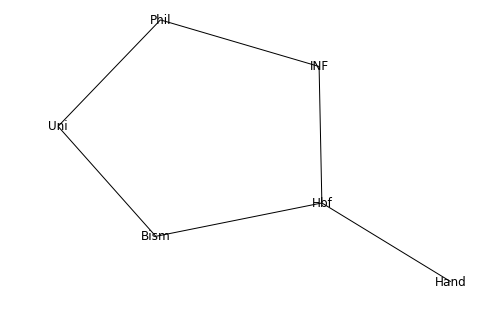

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 168} steit aus, time 168
Es sind 14 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 168


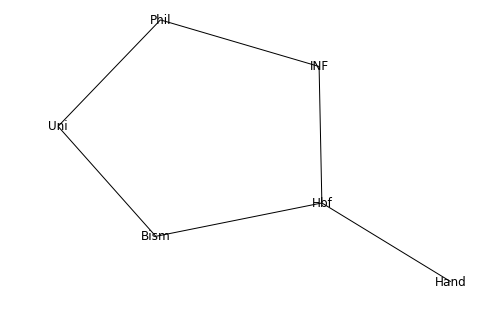

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 168} steit aus, time 168
Es sind 13 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 168


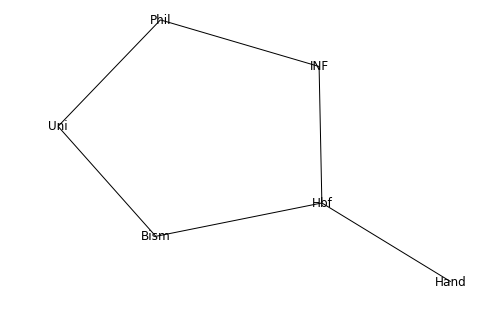

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 168} steit aus, time 168
Es sind 12 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 168


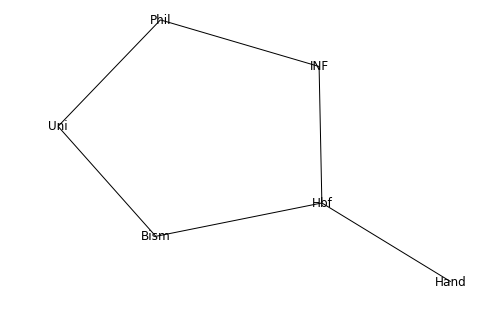

acton: exit
Fahrzeug 0, Passagier {'station': 2, 'exit_time': 168} steit aus, time 168
Es sind 11 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 168


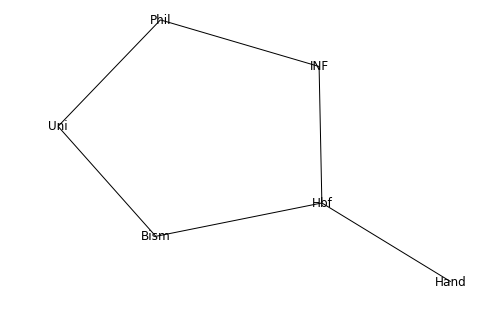

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 181} steit aus, time 168
Es sind 10 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 168


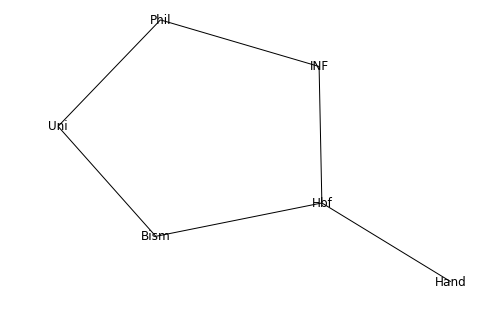

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 183} steit aus, time 168
Es sind 4 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 3, der nächste Halt 4, die aktuelle Zeit: 179


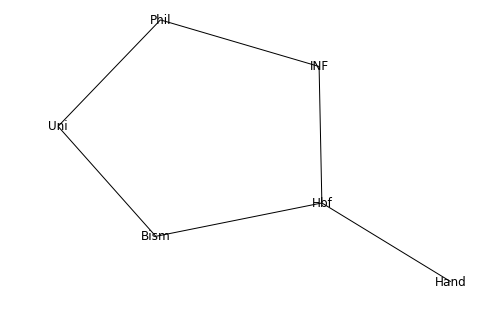

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 26 Plätze frei
Warten: []
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 181


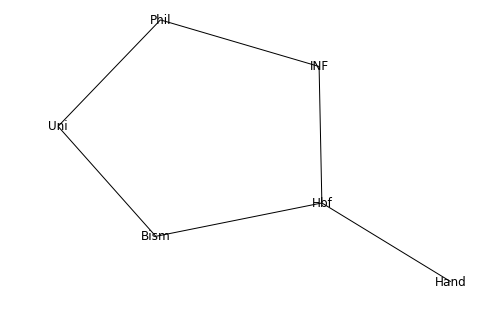

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 183} steit aus, time 181
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 181


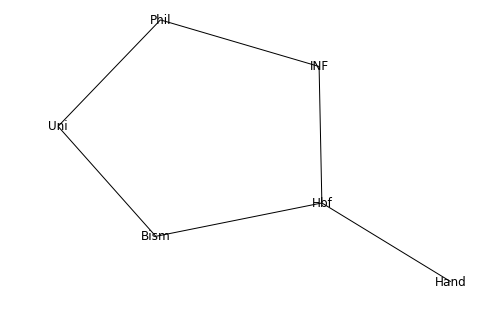

acton: exit
Fahrzeug 1, Passagier {'station': 2, 'exit_time': 168} steit aus, time 181
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0, die aktuelle Zeit: 182


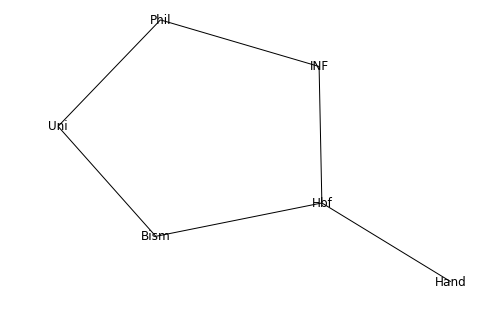

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 20 Plätze frei
Warten: []
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 183


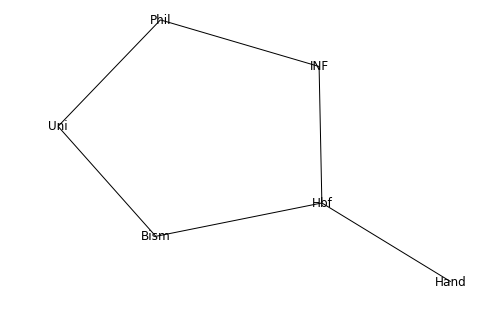

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 181} steit aus, time 183
Es sind 1 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 183


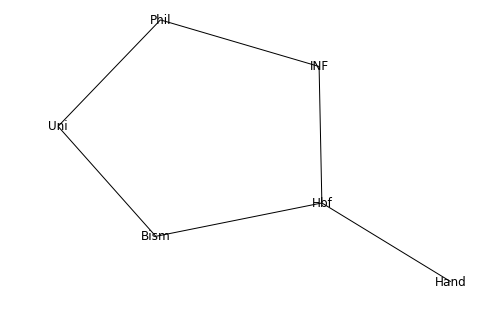

acton: exit
Fahrzeug 1, Passagier {'station': 3, 'exit_time': 181} steit aus, time 183
Es sind 0 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 195


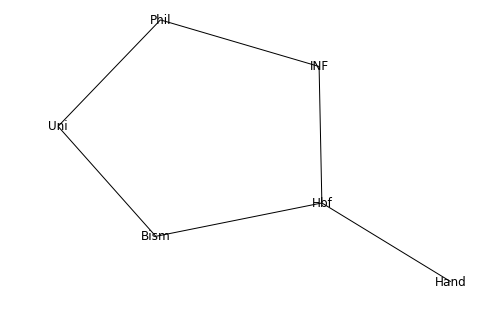

acton: exit
Fahrzeug 0, Passagier {'station': 0, 'exit_time': 195} steit aus, time 195
Es sind 9 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 4, der nächste Halt 0, die aktuelle Zeit: 195


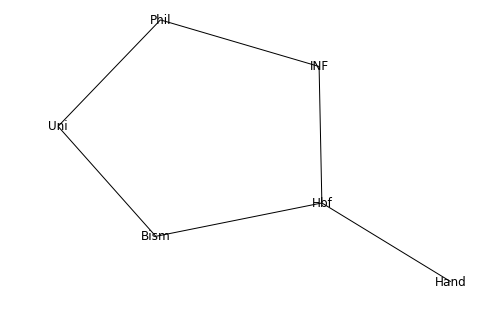

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 30 Plätze frei
Warten: []
Fahrzeug 0 ist am Knoten 0, der nächste Halt 4, die aktuelle Zeit: 198


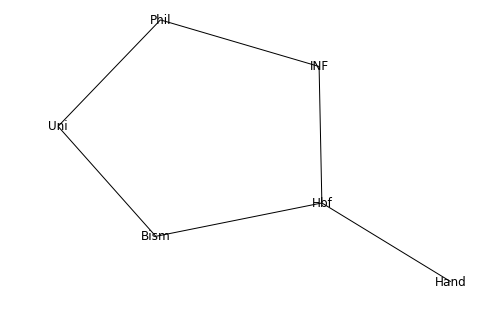

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 21 Plätze frei
Warten: []
Fahrzeug 0 ist am Knoten 4, der nächste Halt 3, die aktuelle Zeit: 210


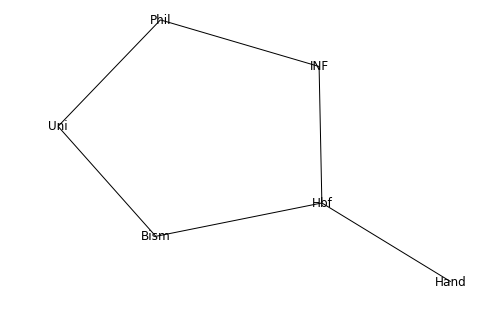

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 21 Plätze frei
Warten: []
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 210


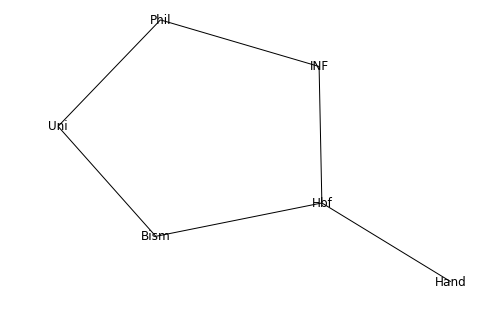

acton: load
Fahrzeug 1 load
Fahrzeug 1 hat 30 Plätze frei
Warten: []
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 211


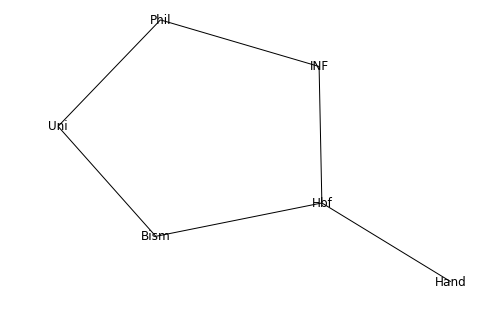

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 211} steit aus, time 211
Es sind 8 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 212


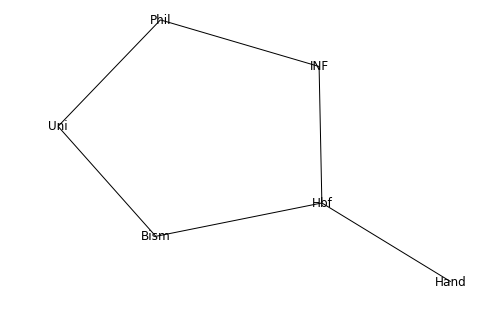

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 212} steit aus, time 212
Es sind 7 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 212


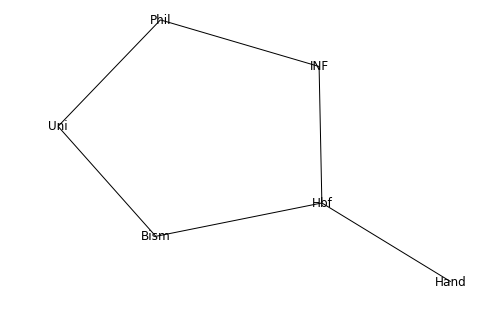

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 224} steit aus, time 212
Es sind 6 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 212


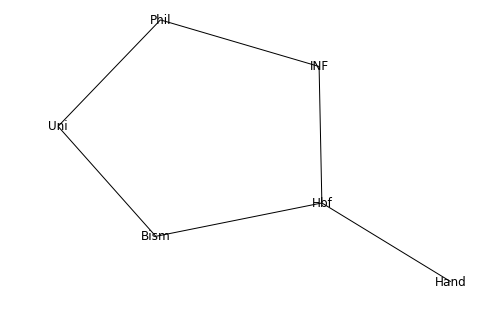

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 212} steit aus, time 212
Es sind 5 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 212


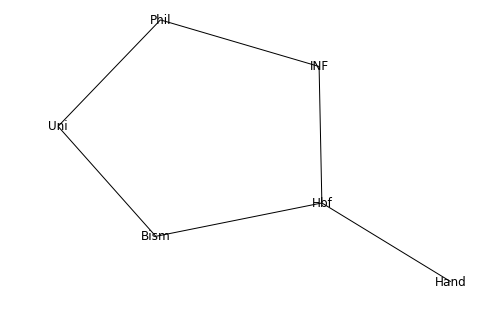

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 224} steit aus, time 212
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 223


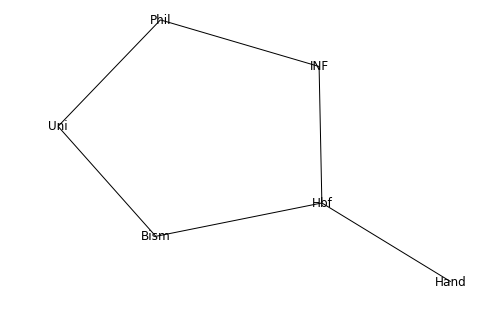

acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 26 Plätze frei
Warten: []
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 224


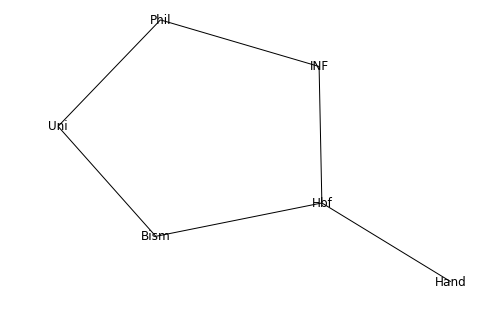

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 224} steit aus, time 224
Es sind 3 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 224


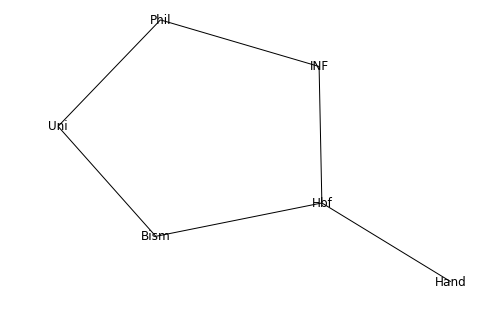

acton: exit
Fahrzeug 0, Passagier {'station': 3, 'exit_time': 224} steit aus, time 224
Es sind 2 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 224


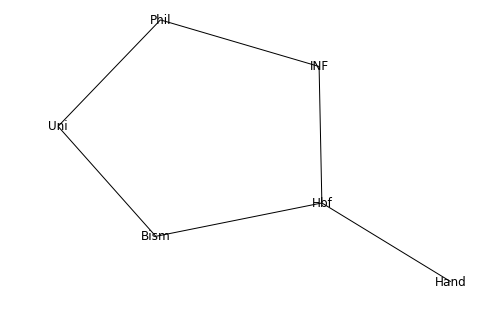

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 212} steit aus, time 224
Es sind 1 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1, die aktuelle Zeit: 224


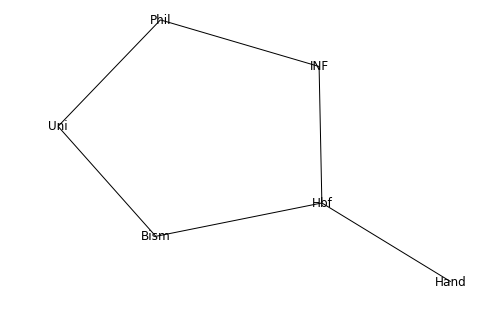

acton: exit
Fahrzeug 0, Passagier {'station': 4, 'exit_time': 212} steit aus, time 224
Es sind 0 Passagiere in der Bahn
Ende


In [3]:
graph = nx.Graph()

graph.add_node('Hbf')
graph.add_node('INF')
graph.add_node('Phil')
graph.add_node('Uni')
graph.add_node('Bism')
graph.add_node('Hand')
#graph.add_node('Rohr')
#graph.add_node('Zieg')

ListeNodes = list(graph.node)

#Rundfahrt 
graph.add_edge(ListeNodes[0],ListeNodes[1])
graph.add_edge(ListeNodes[1],ListeNodes[0])
graph.add_edge(ListeNodes[1],ListeNodes[2])
graph.add_edge(ListeNodes[2],ListeNodes[1])
graph.add_edge(ListeNodes[2],ListeNodes[3])
graph.add_edge(ListeNodes[3],ListeNodes[2])
graph.add_edge(ListeNodes[3],ListeNodes[4])
graph.add_edge(ListeNodes[4],ListeNodes[3])
graph.add_edge(ListeNodes[4],ListeNodes[0])
graph.add_edge(ListeNodes[0],ListeNodes[4])

#Zubringer
graph.add_edge(ListeNodes[0],ListeNodes[5])
#graph.add_edge(ListeNodes[6],ListeNodes[0])
#graph.add_edge(ListeNodes[1],ListeNodes[5])
#graph.add_edge(ListeNodes[5],ListeNodes[1])
#graph.add_edge(ListeNodes[3],ListeNodes[7])
#graph.add_edge(ListeNodes[7],ListeNodes[3])

nx.draw_kamada_kawai(graph, with_labels = True)

passengers = [#
    [{'station': 1, 'exit_time': 10}]*20 + [{'station': 2, 'exit_time': 20}]*20 , #Hbf
    [{'station': 2, 'exit_time': 20}]*20 + [{'station': 3, 'exit_time': 10}]*20, # INF
    [{'station': 3, 'exit_time': 10}]*20 + [{'station': 4, 'exit_time': 20}]*20, # Phil
    [{'station': 4, 'exit_time': 30}]*20 + [{'station': 0, 'exit_time': 15}]*20, # Uni
    [{'station': 0, 'exit_time': 15}]*20 + [{'station': 1, 'exit_time': 10}]*20 + [{'station': 3, 'exit_time': 30}]*20 # Bism
              ]#
bms = [{'color': '#fff000', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [4, 3, 2, 1, 0], 'name': 0, 'travel_times': [12, 13, 14, 15, 16]},
    {'color': '#ff00f0', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [0, 1, 2, 3, 4], 'name': 1, 'travel_times': [15, 14, 13, 12, 16]}
       ]#

 
# shuffle passengers
shuffle0(passengers)
#print(passengers[4])

event0 = Event(0,'load',0)
event1 = Event(0,'load',1)
eventq = []
hq.heappush(eventq, event0)
hq.heappush(eventq, event1)

solve(eventq, passengers, bms, graph)